# **Import Package**

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean
!pip install yfinance
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
import time

# **1. Dataset**

# **Mengunduh Daset**

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Daftar ticker saham LQ45
tickers = [
    "ACES.JK", "ADMR.JK", "ADRO.JK", "AKRA.JK", "AMMN.JK", "AMRT.JK", "ANTM.JK", "ARTO.JK", "ASII.JK",
    "BBCA.JK", "BBNI.JK", "BBRI.JK", "BBTN.JK", "BMRI.JK", "BRIS.JK", "BRPT.JK", "BUKA.JK", "CPIN.JK",
    "ESSA.JK", "EXCL.JK", "GOTO.JK", "ICBP.JK", "INCO.JK", "INDF.JK", "INKP.JK", "INTP.JK", "ISAT.JK",
    "ITMG.JK", "JSMR.JK", "KLBF.JK", "MAPI.JK", "MBMA.JK", "MDKA.JK", "MEDC.JK", "MTEL.JK", "PGAS.JK",
    "PGEO.JK", "PTBA.JK", "SIDO.JK", "SMGR.JK", "SMRA.JK", "TLKM.JK", "TOWR.JK", "UNTR.JK", "UNVR.JK"
]

# Unduh data harga penutupan mingguan
data = yf.download(tickers, start='2014-11-04', end='2024-11-04', interval="1wk", rounding=True)['Close']
data.index = data.index.date
data



/tmp/ipython-input-1929259402.py:15: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start='2014-11-04', end='2024-11-04', interval="1wk", rounding=True)['Close']
[*********************100%***********************]  45 of 45 completed


Ticker      ACES.JK  ADMR.JK  ADRO.JK  AKRA.JK  AMMN.JK  AMRT.JK  ANTM.JK  \
2014-11-03   576.70      NaN   423.87   604.05      NaN   471.24   633.21   
2014-11-10   584.05      NaN   387.10   592.67      NaN   471.24   633.21   
2014-11-17   598.74      NaN   416.13   586.34      NaN   466.75   663.68   
2014-11-24   591.39      NaN   418.07   588.24      NaN   471.24   663.68   
2014-12-01   580.37      NaN   433.55   572.43      NaN   457.78   653.52   
...             ...      ...      ...      ...      ...      ...      ...   
2024-09-30   803.44  1420.47  3363.27  1552.40   8875.0  3108.99  1452.67   
2024-10-07   831.47  1349.68  3416.23  1480.31   9150.0  3128.73  1490.77   
2024-10-14   878.18  1349.68  3336.79  1388.99   9800.0  3316.26  1547.93   
2024-10-21   854.82  1321.37  3230.86  1355.35   9225.0  3434.69  1509.83   
2024-10-28   840.81  1311.93  3345.61  1297.67   9025.0  3197.82  1447.91   

Ticker      ARTO.JK  ASII.JK   BBCA.JK  ...  PGAS.JK  PGEO.JK  PTBA.JK  \
2014-11-03      NaN  4178.91   2077.15  ...  3362.29      NaN   732.50   
2014-11-10      NaN  4314.20   2113.95  ...  3447.77      NaN   698.94   
2014-11-17      NaN  4178.91   2179.37  ...  3504.76      NaN   747.09   
2014-11-24      NaN  4284.14   2142.57  ...  3390.78      NaN   767.52   
2014-12-01      NaN  4269.10   2183.46  ...  3419.27      NaN   780.65   
...             ...      ...       ...  ...      ...      ...      ...   
2024-09-30   2830.0  4730.48  10111.88  ...  1355.11  1102.64  2653.06   
2024-10-07   2860.0  4661.59  10015.35  ...  1373.18  1141.16  2688.55   
2024-10-14   2860.0  4519.21  10377.35  ...  1377.69  1102.64  2706.29   
2024-10-21   2860.0  4893.87  10377.35  ...  1355.11  1083.38  2555.45   
2024-10-28   2800.0  4753.37  10063.61  ...  1382.21  1040.04  2590.94   

Ticker      SIDO.JK   SMGR.JK  SMRA.JK  TLKM.JK  TOWR.JK   UNTR.JK  UNVR.JK  
2014-11-03   194.37  11562.96  1109.88  1659.09   647.47   9071.99  4341.78  
2014-11-10   194.37  12073.09  1114.30  1738.39   645.91   9240.43  4436.48  
2014-11-17   194.37  12167.56  1233.69  1754.26   645.91   8795.25  4582.18  
2014-11-24   194.37  12091.99  1291.18  1792.32   645.91   8819.32  4633.18  
2014-12-01   195.86  12507.65  1357.50  1801.84   639.67   8506.49  4614.96  
...             ...       ...      ...      ...      ...       ...      ...  
2024-09-30   596.81   3891.02   668.78  2669.72   828.45  24877.22  2059.44  
2024-10-07   606.14   4161.37   702.95  2725.34   818.71  23851.12  2154.35  
2024-10-14   624.79   4364.12   678.54  2873.66   789.47  24991.23  2211.29  
2024-10-21   573.50   4238.61   605.32  2697.53   774.85  25061.37  1993.01  
2024-10-28   564.17   3678.61   624.84  2577.03   779.72  25482.18  1855.40  

[522 rows x 45 columns]

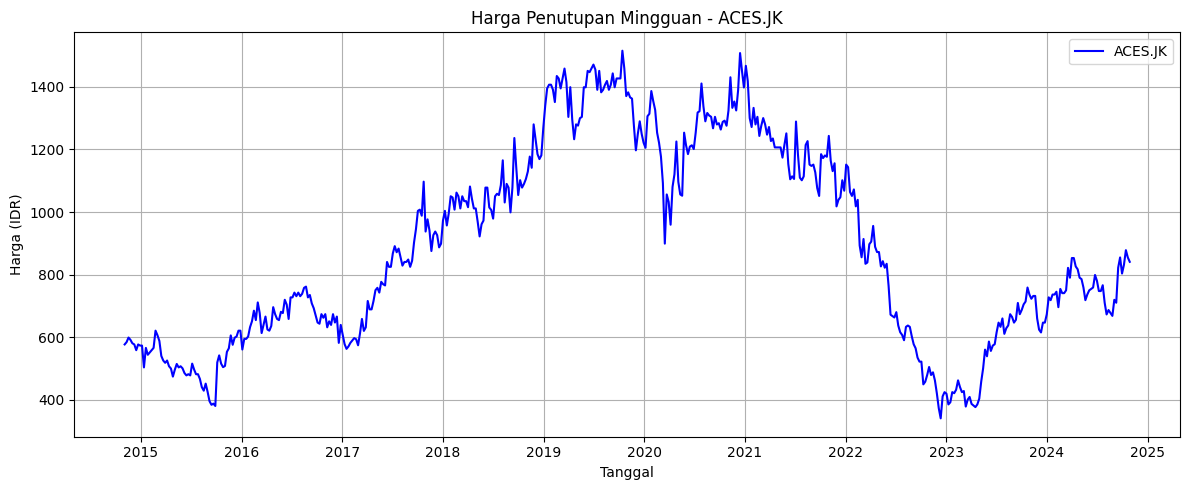

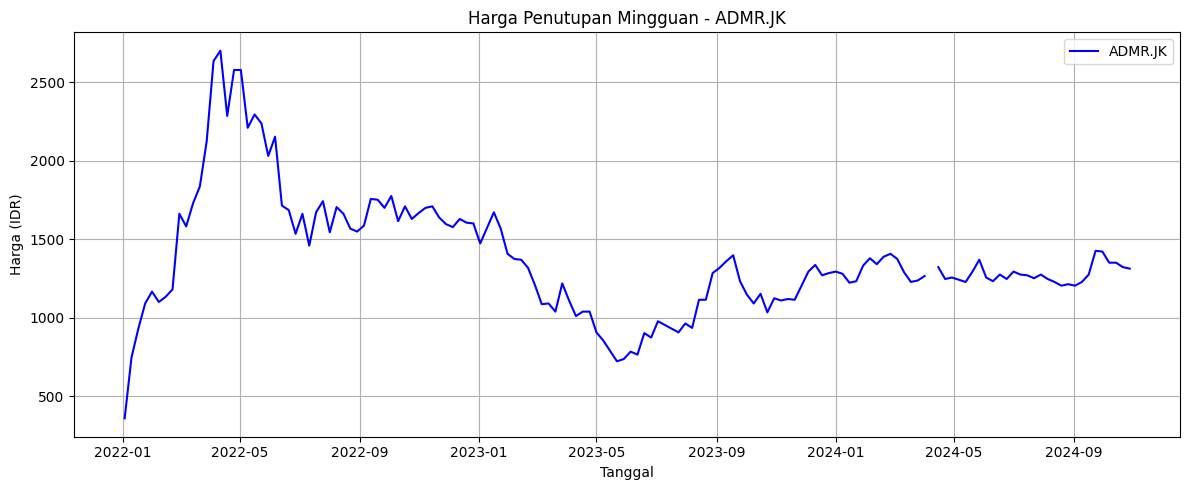

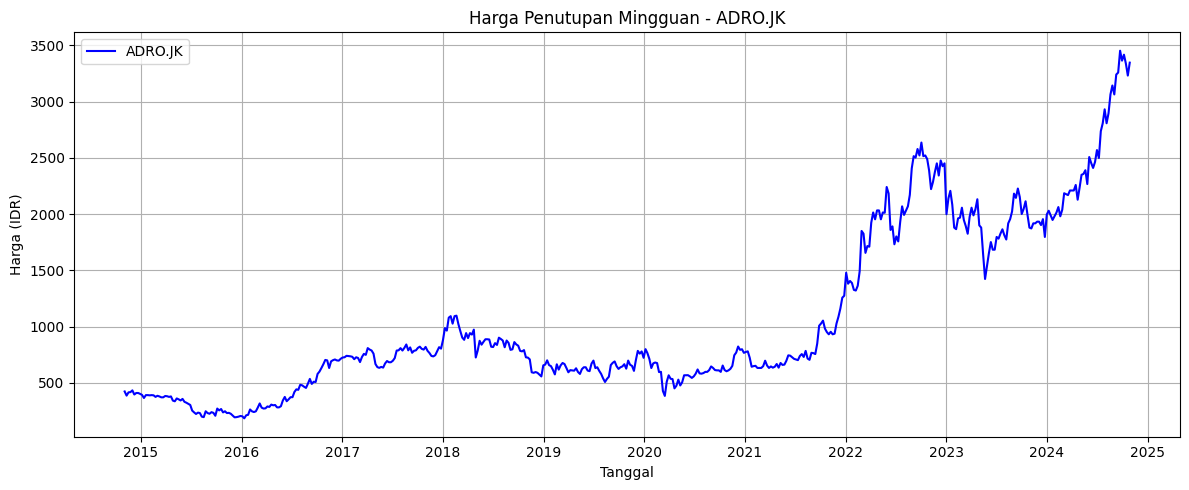

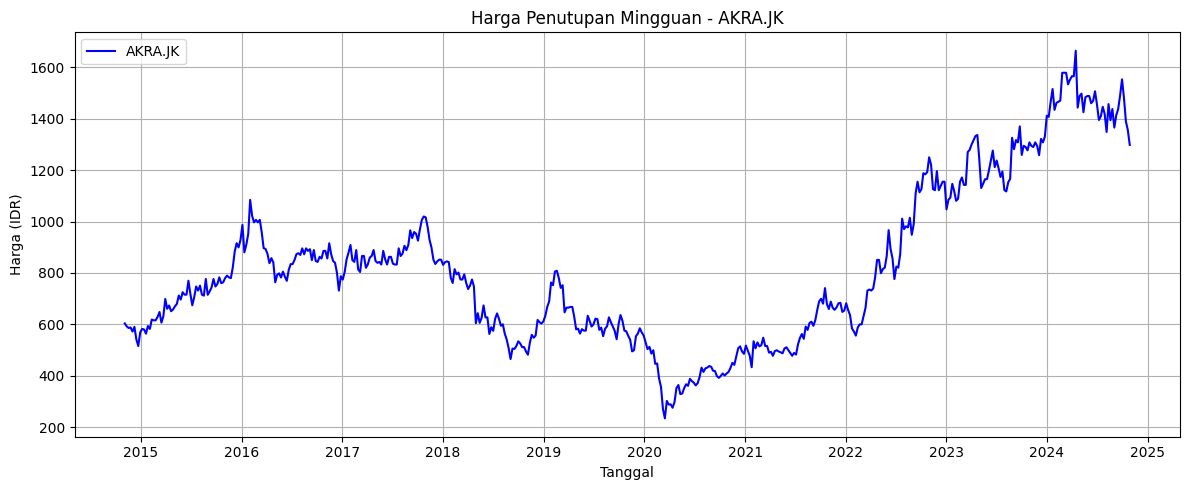

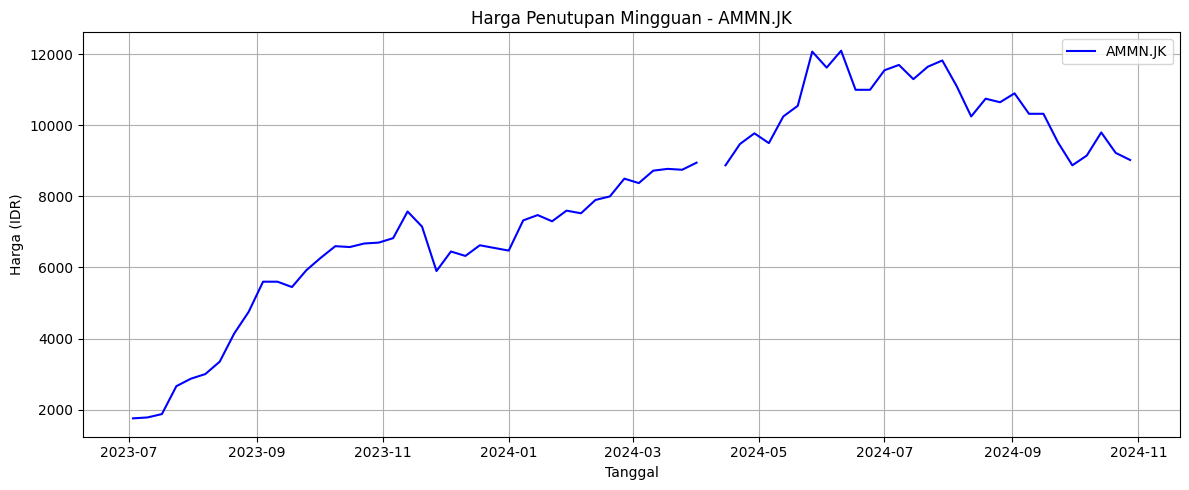

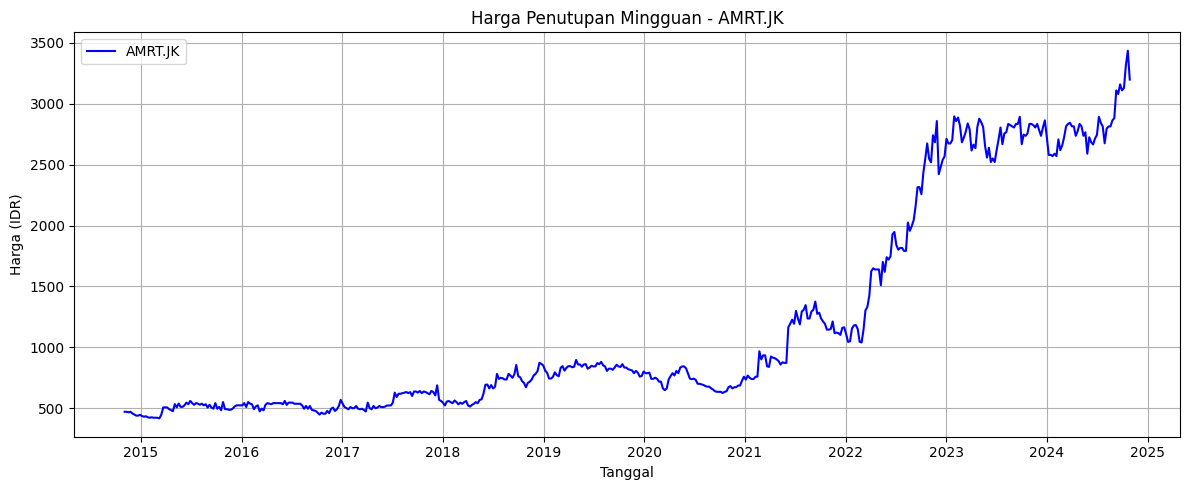

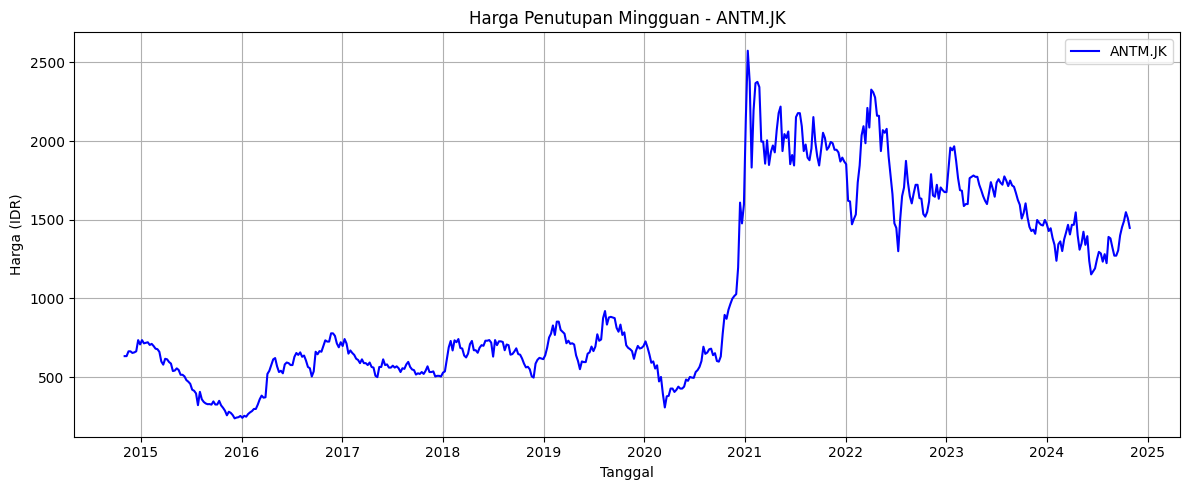

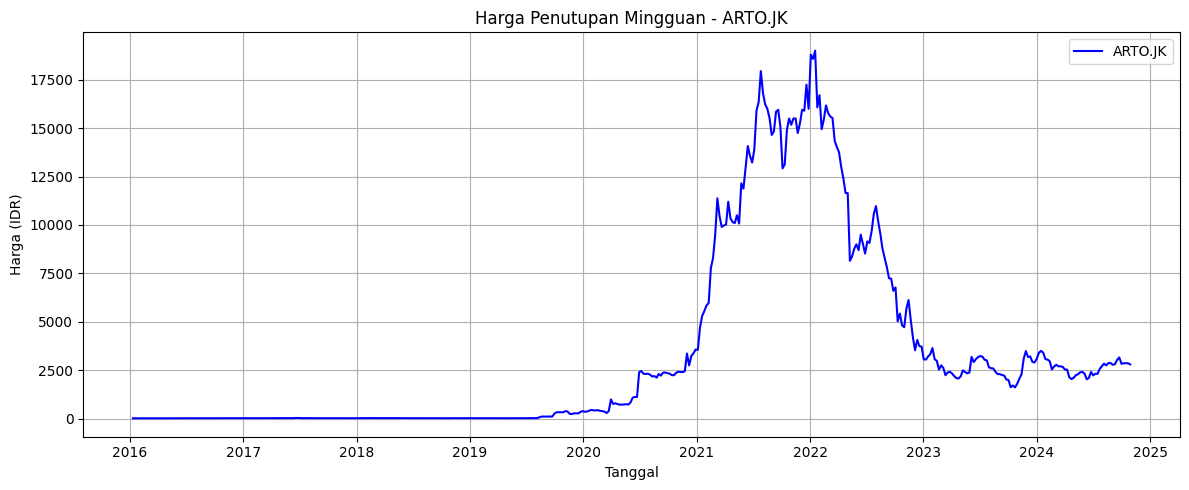

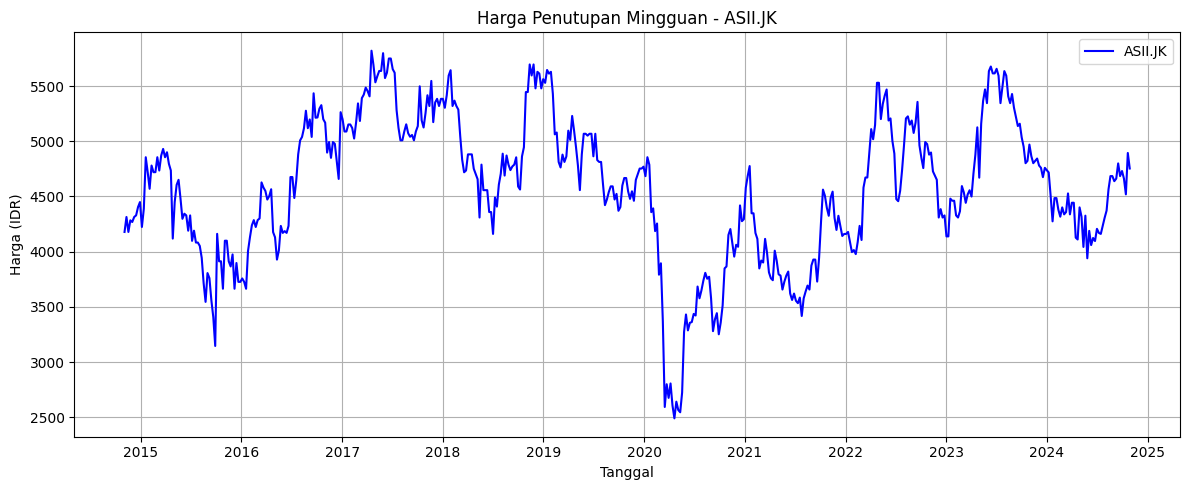

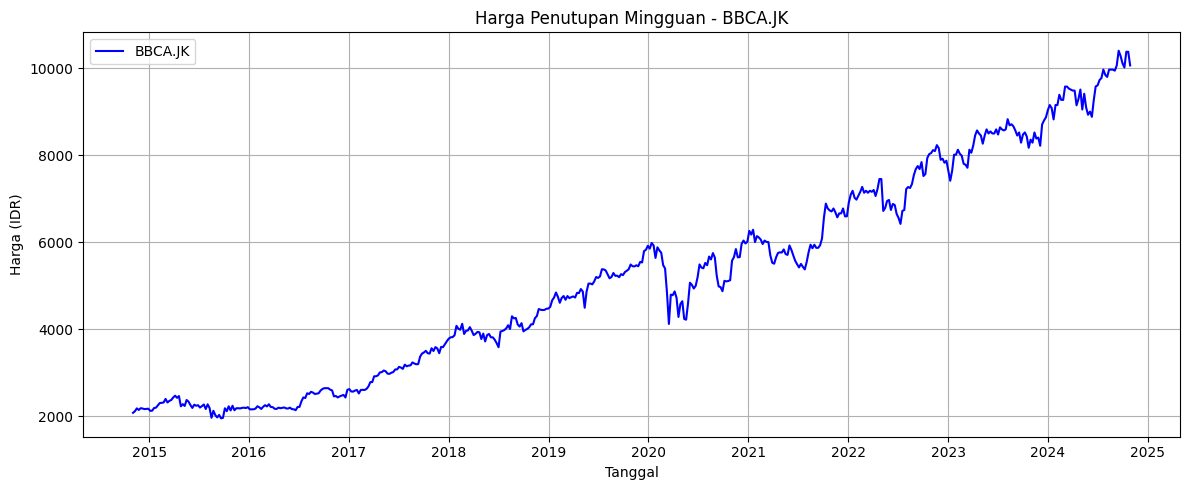

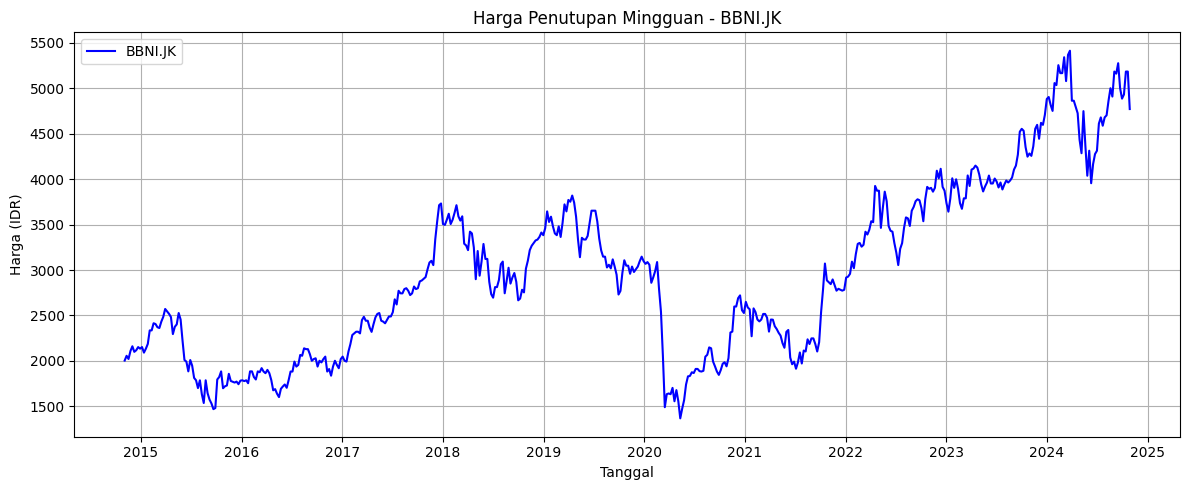

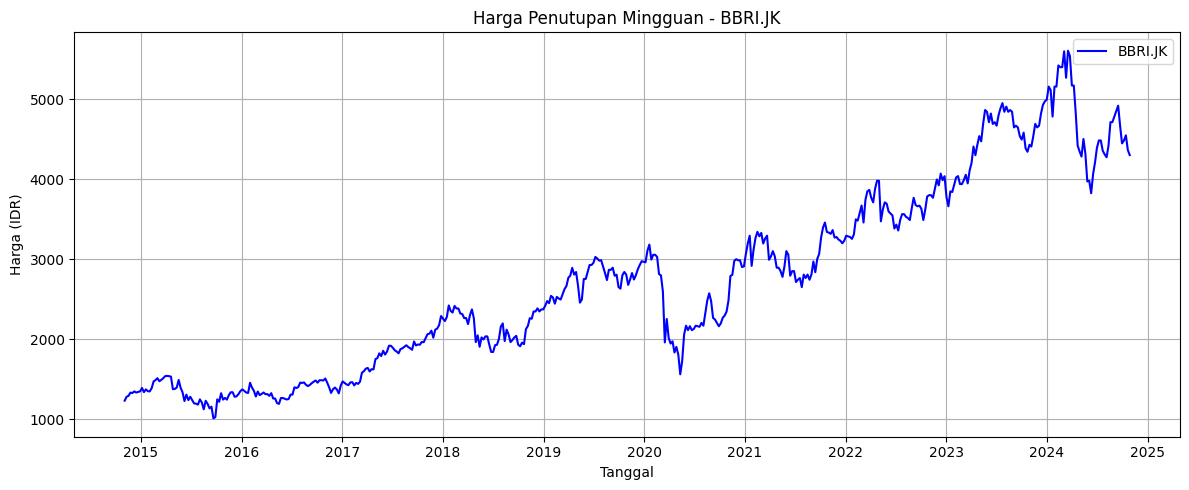

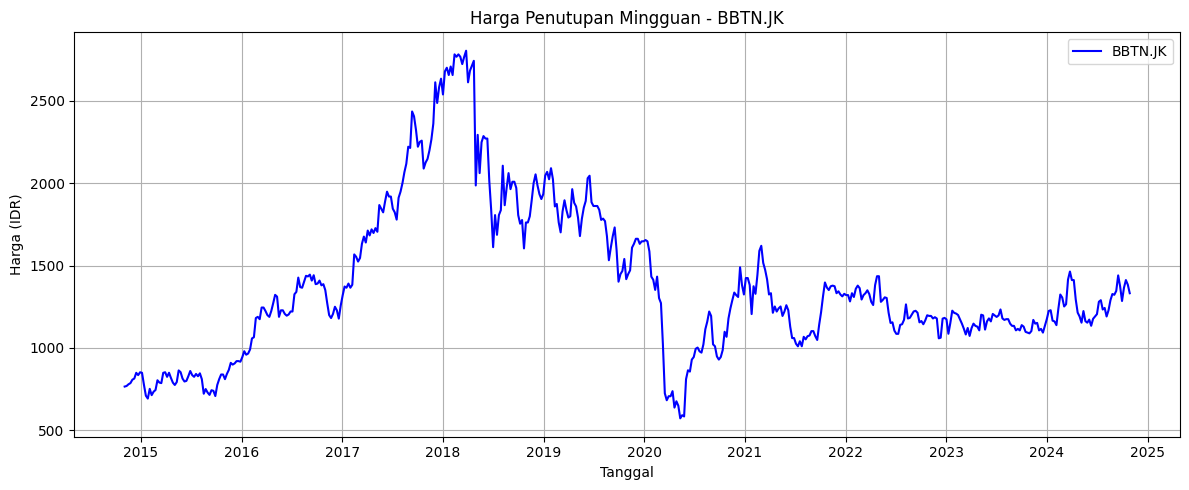

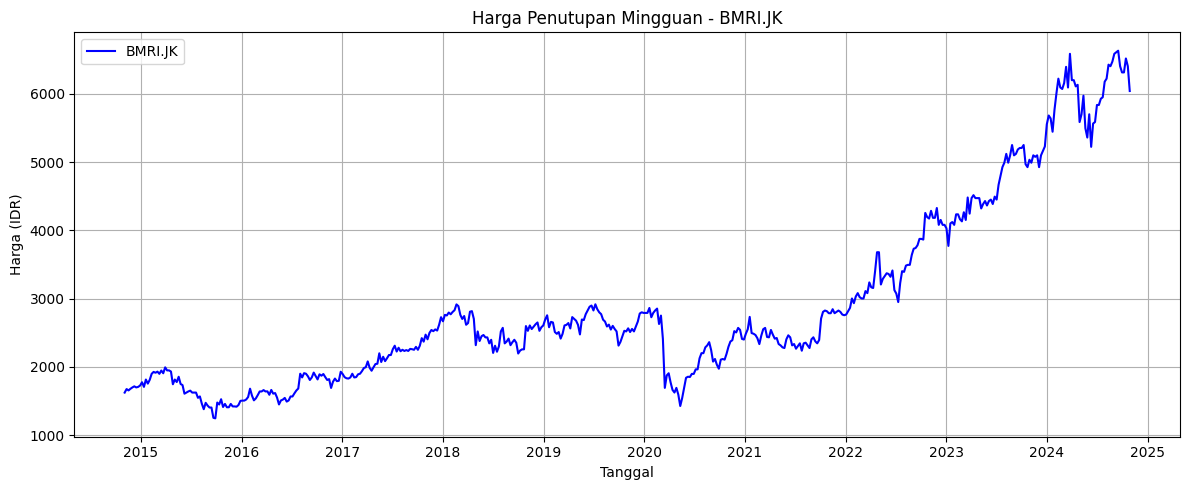

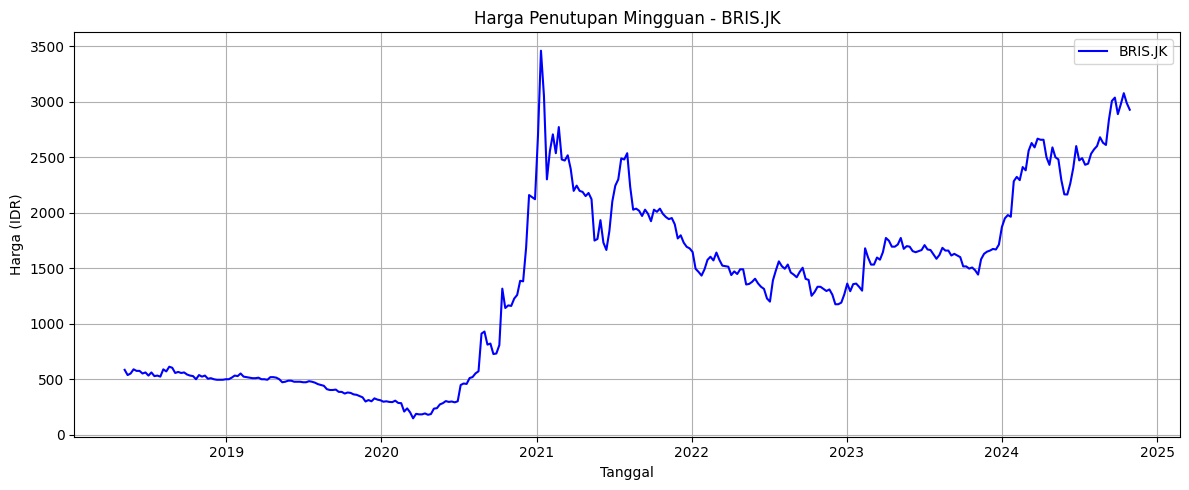

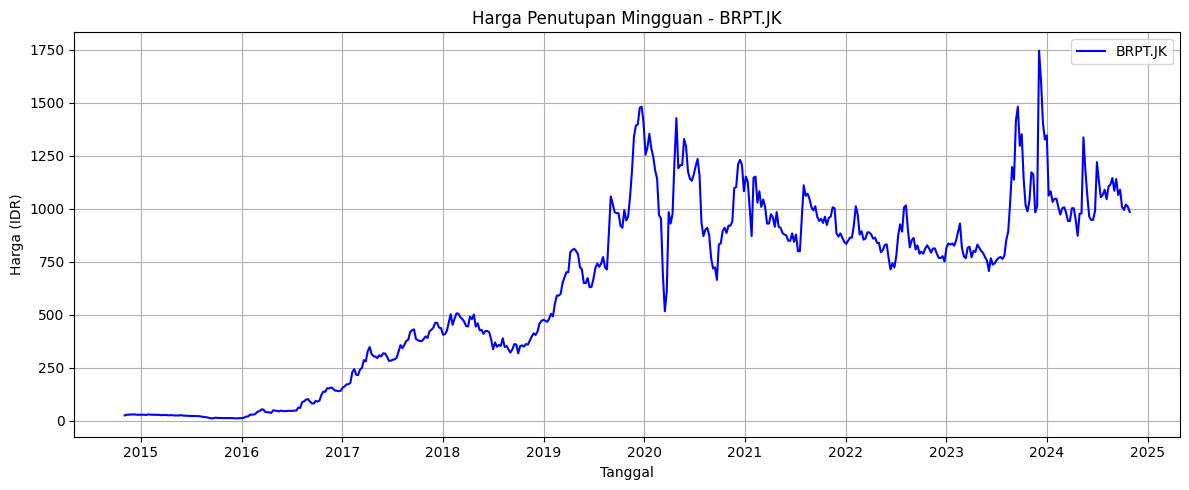

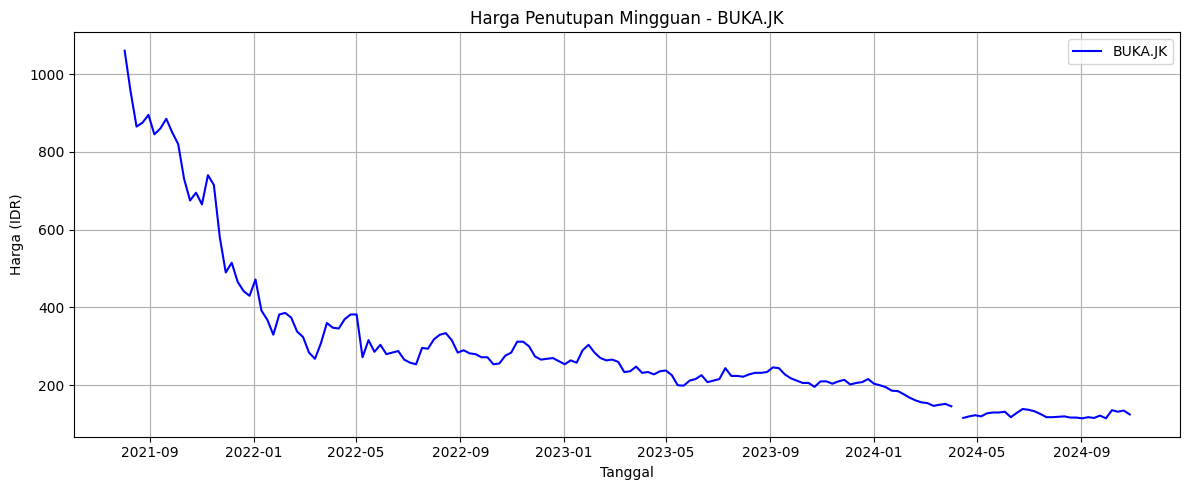

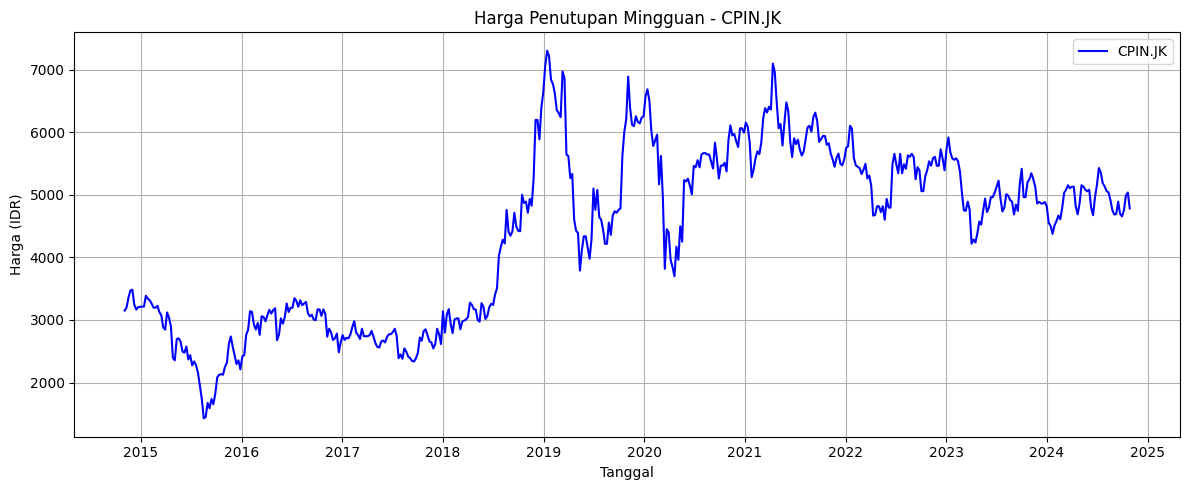

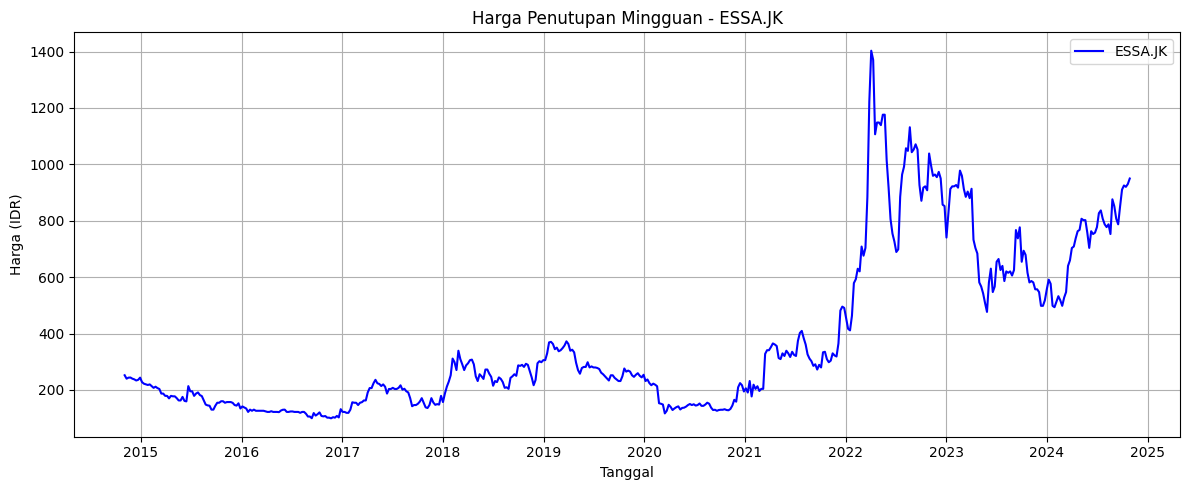

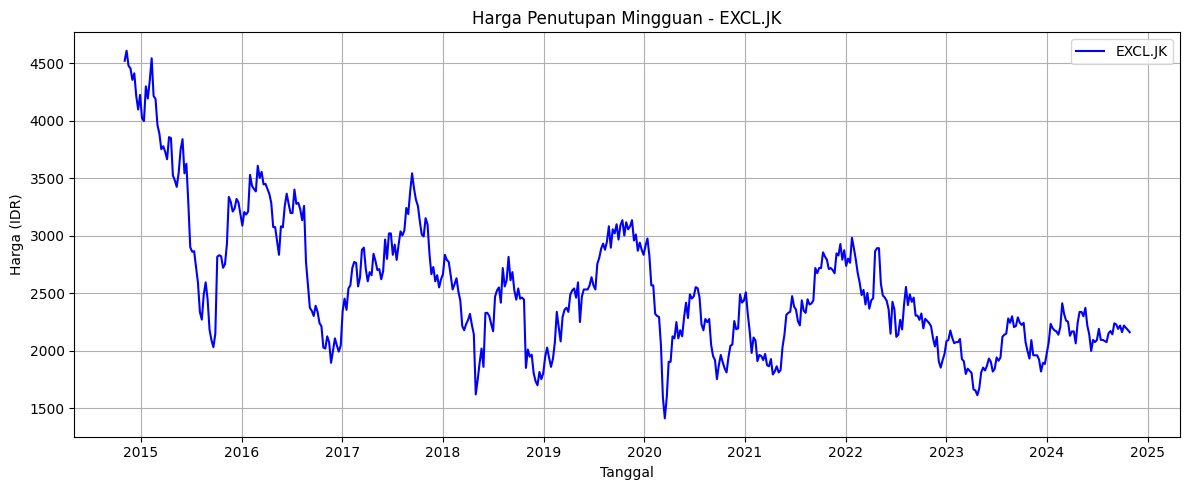

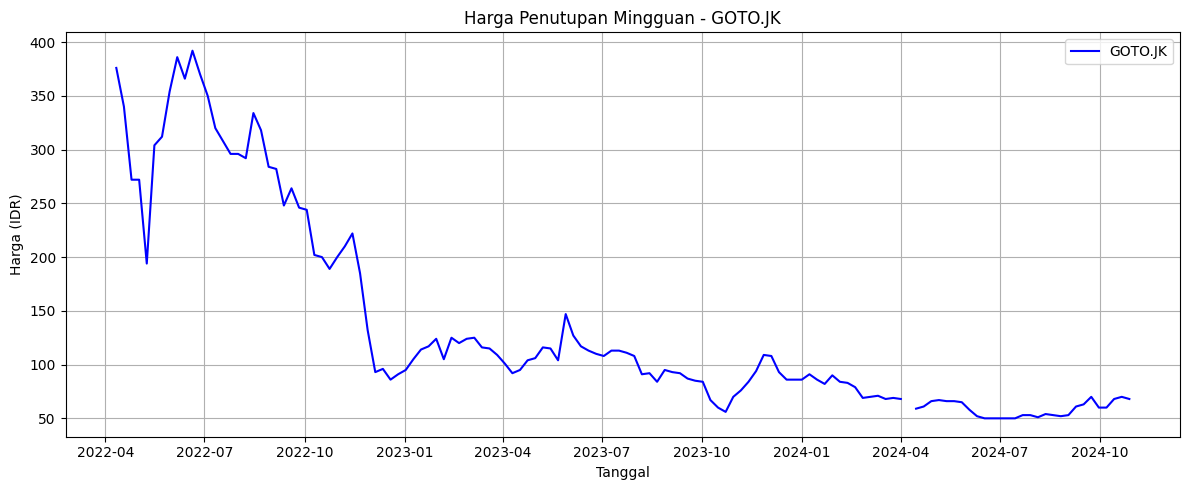

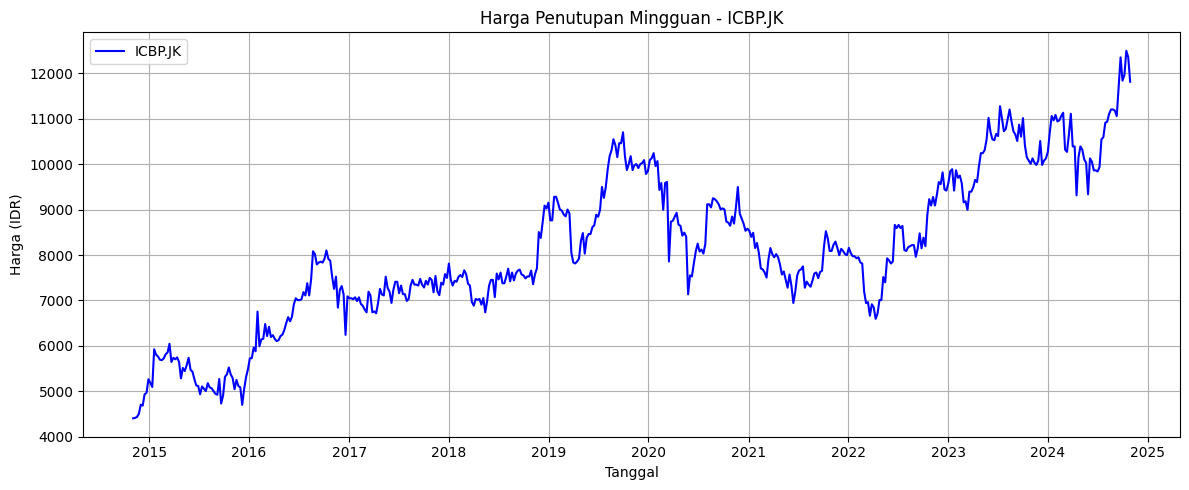

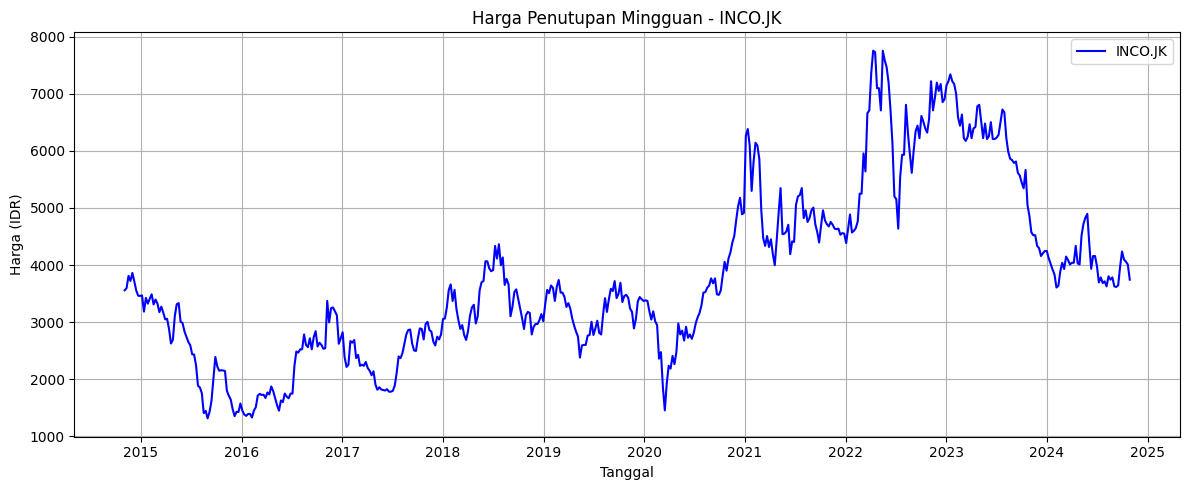

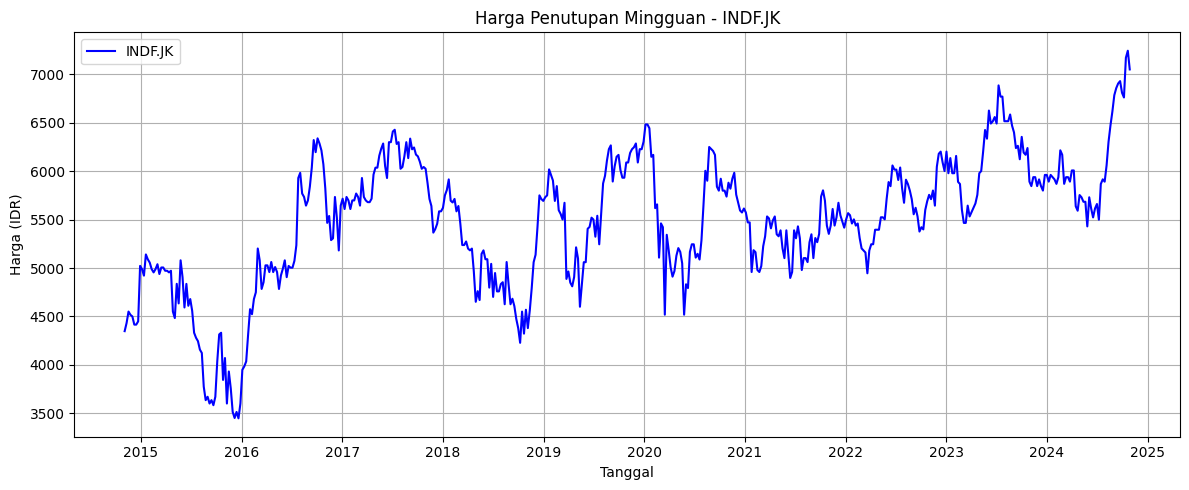

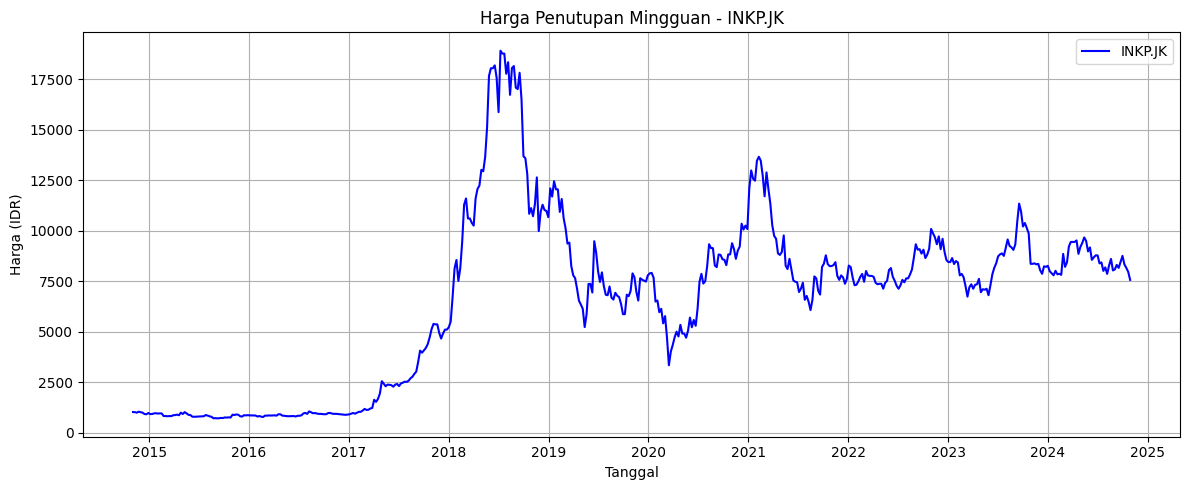

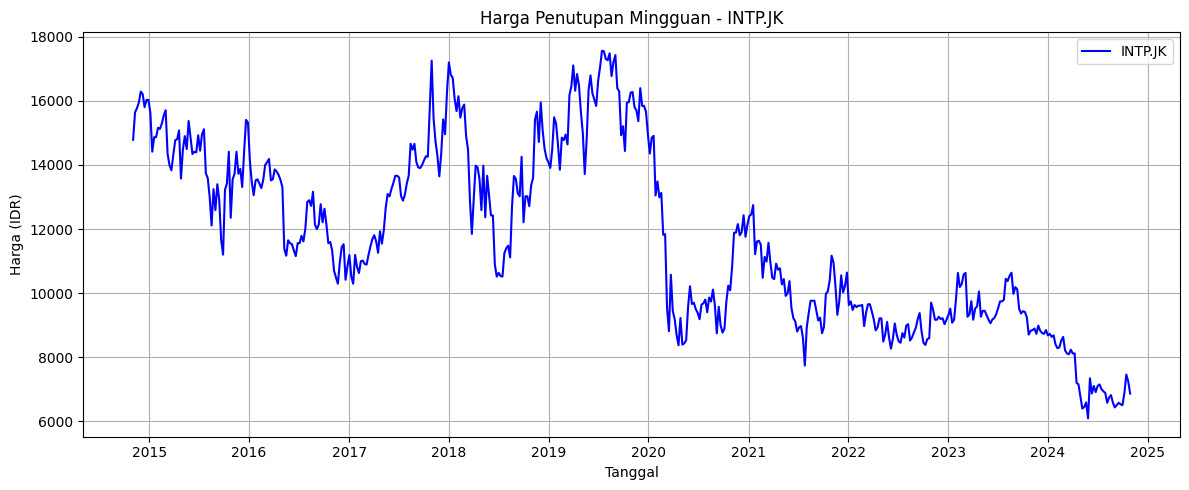

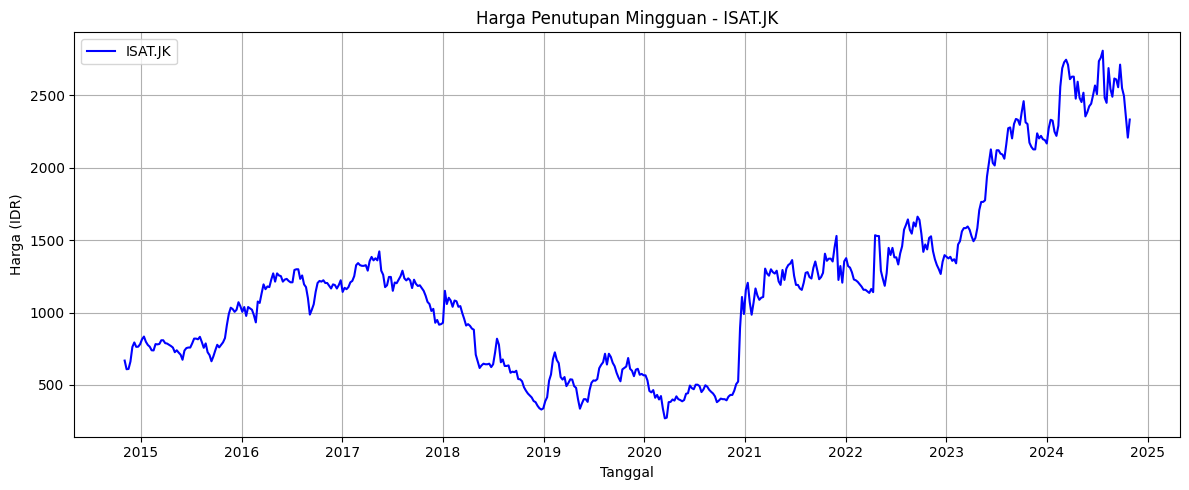

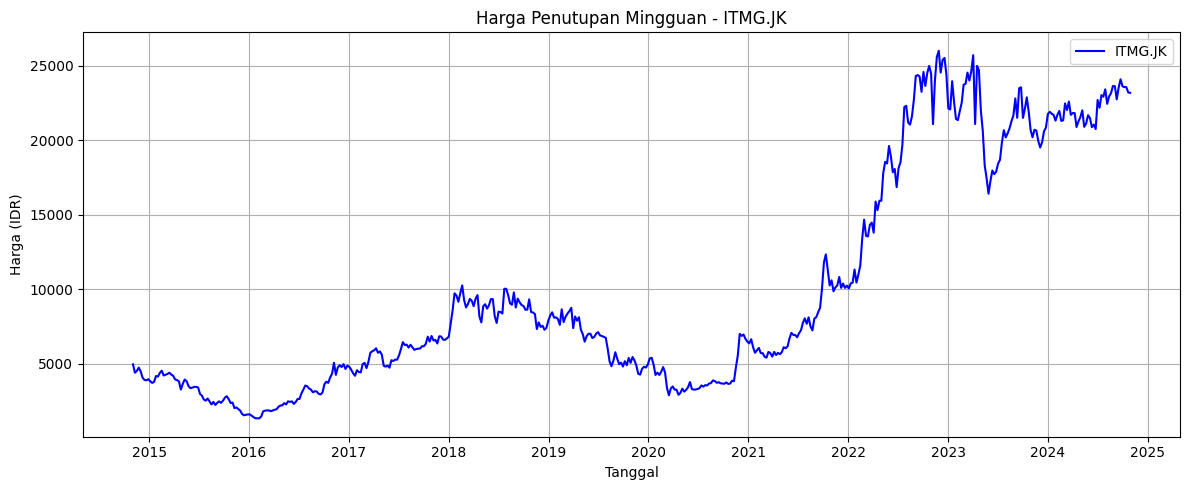

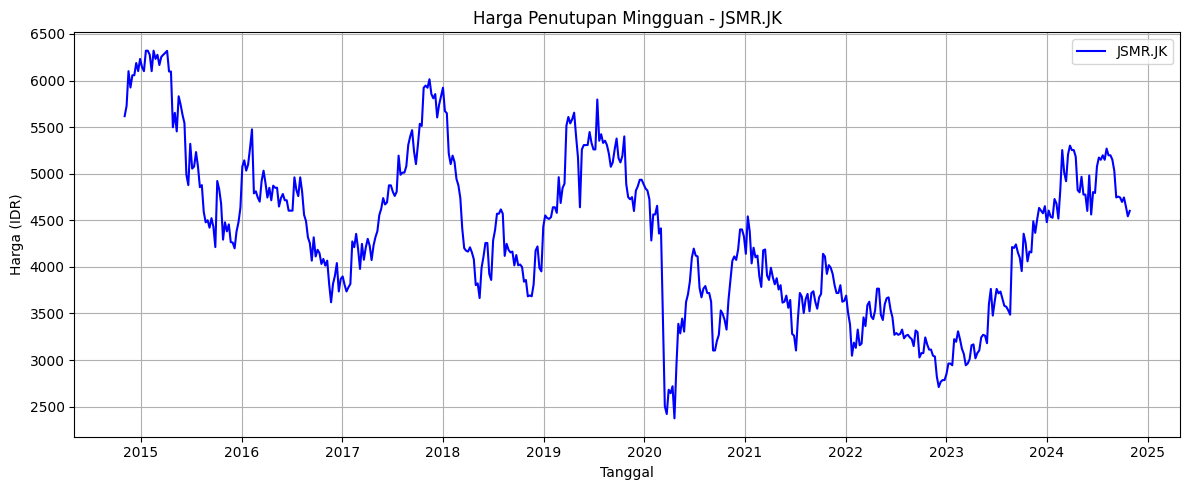

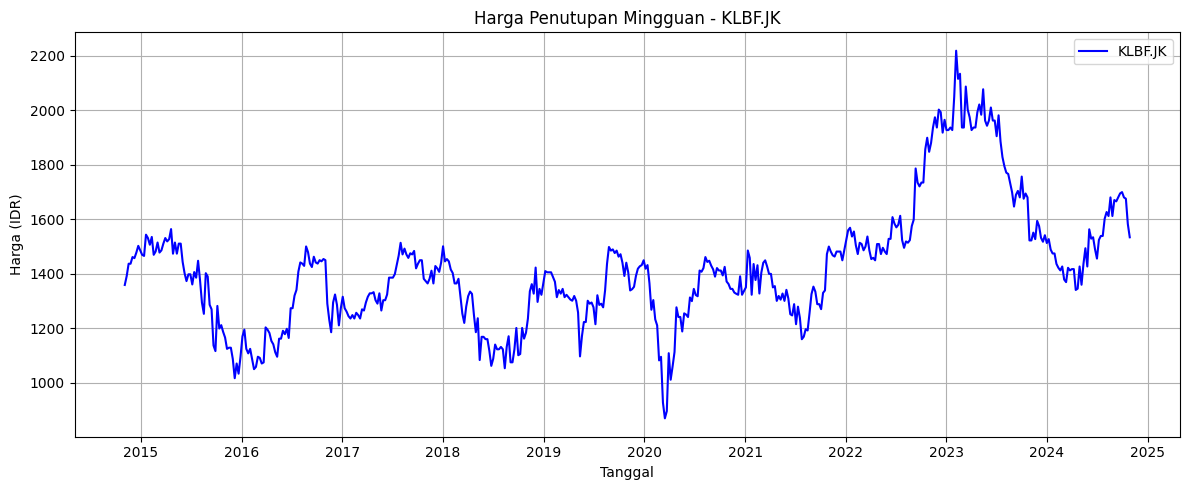

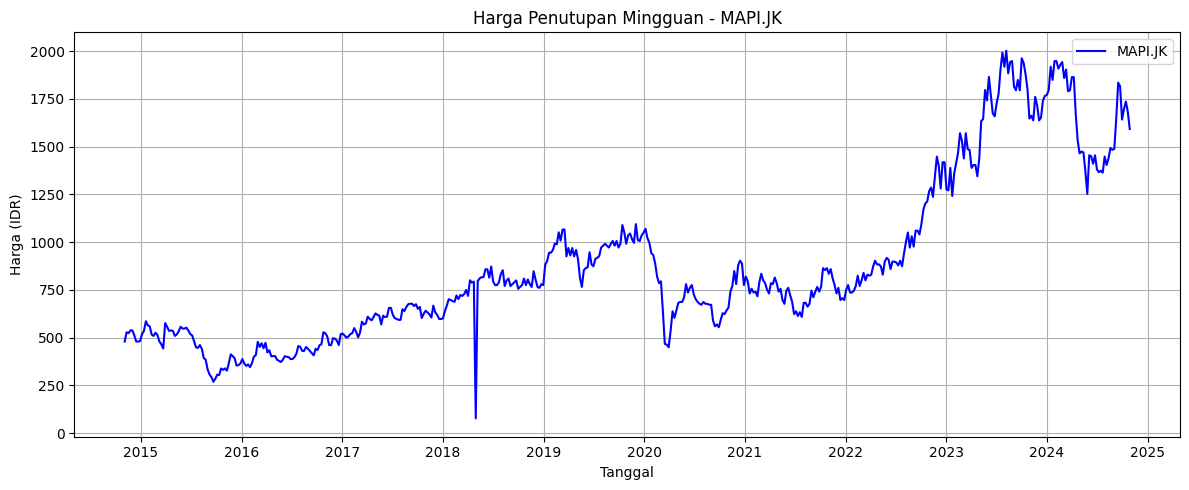

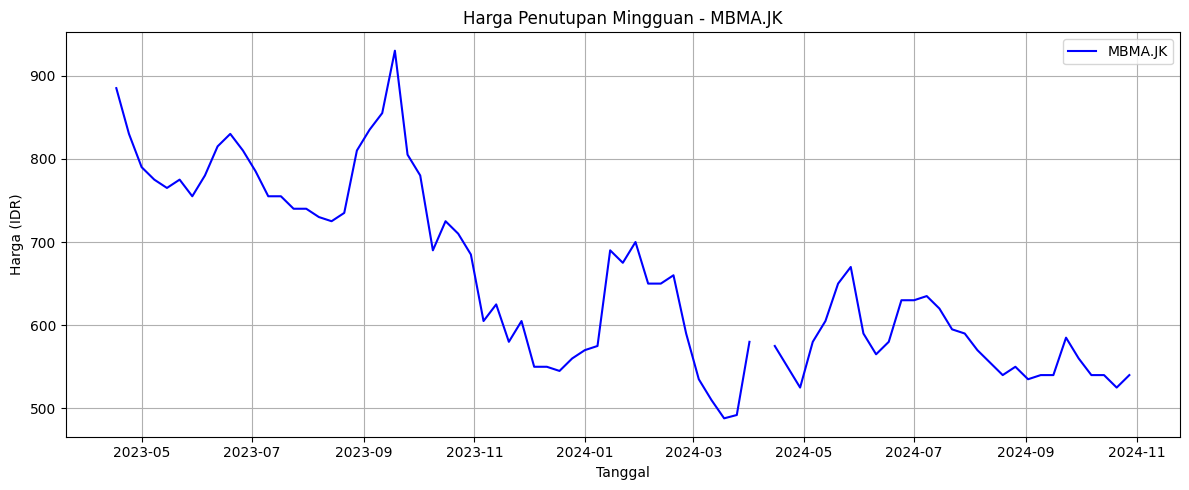

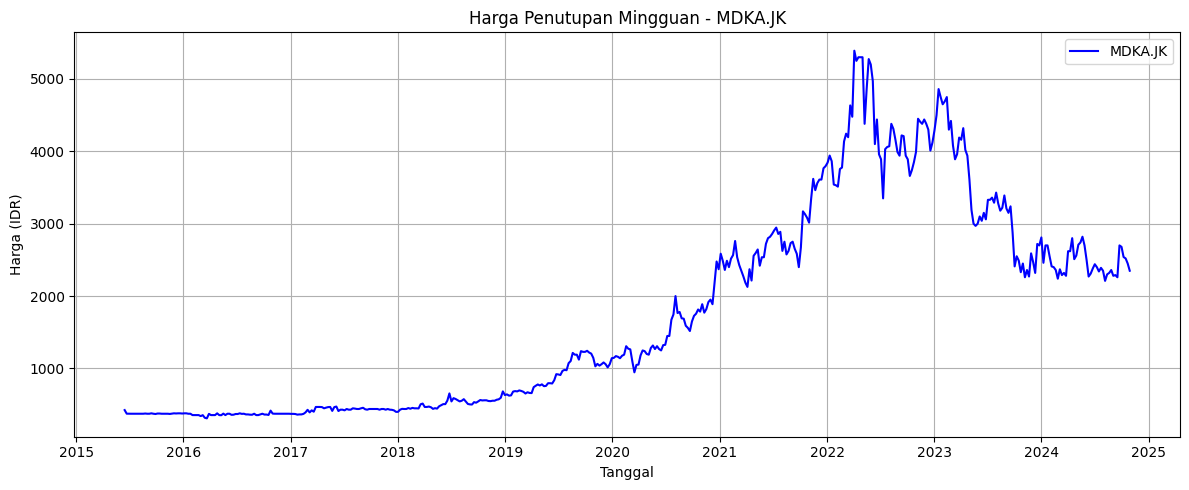

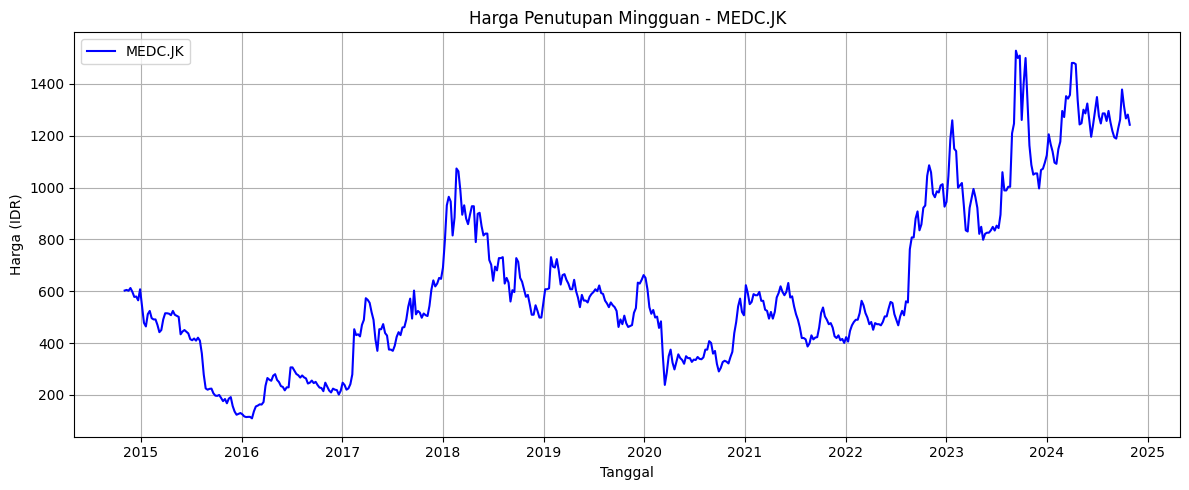

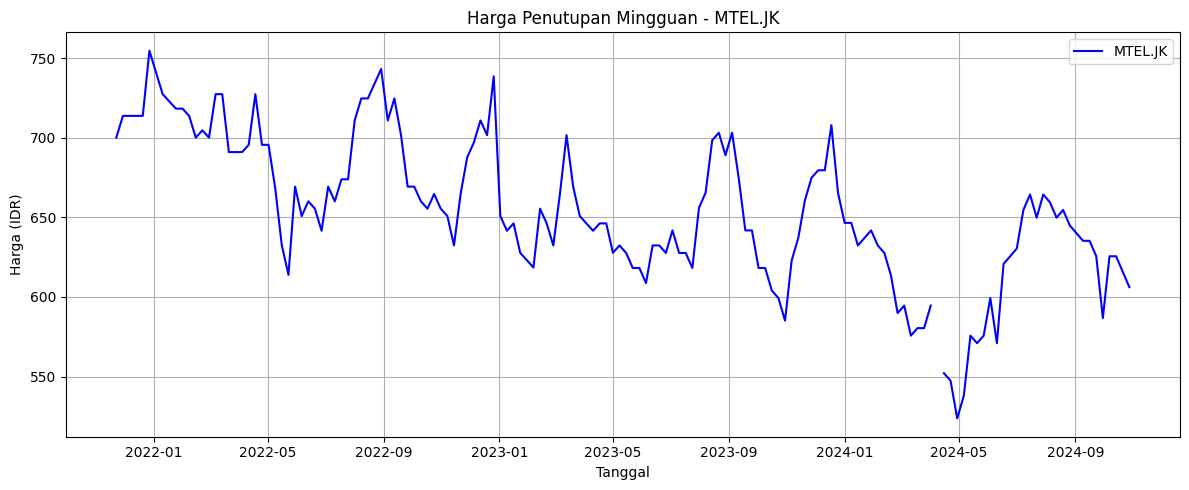

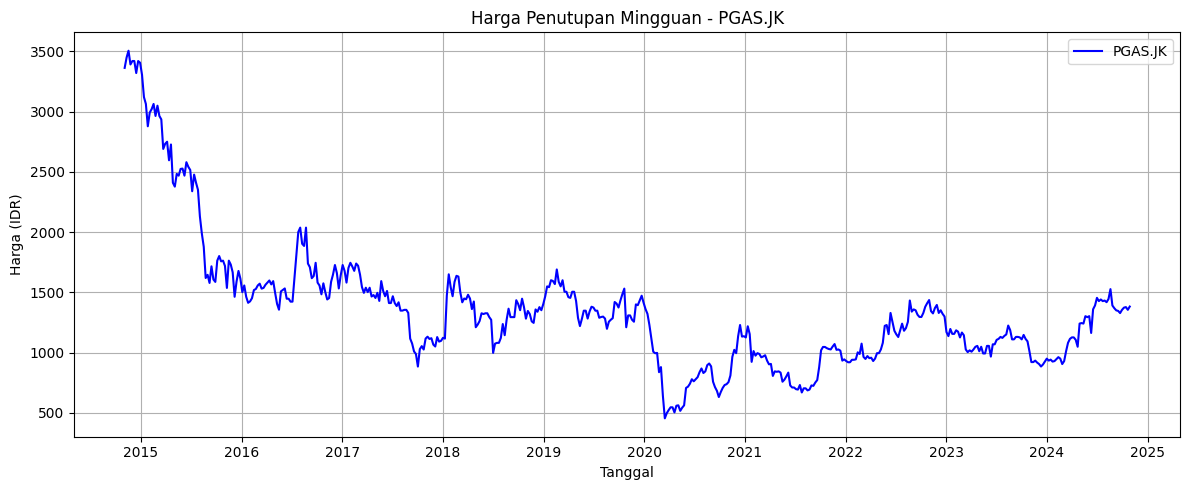

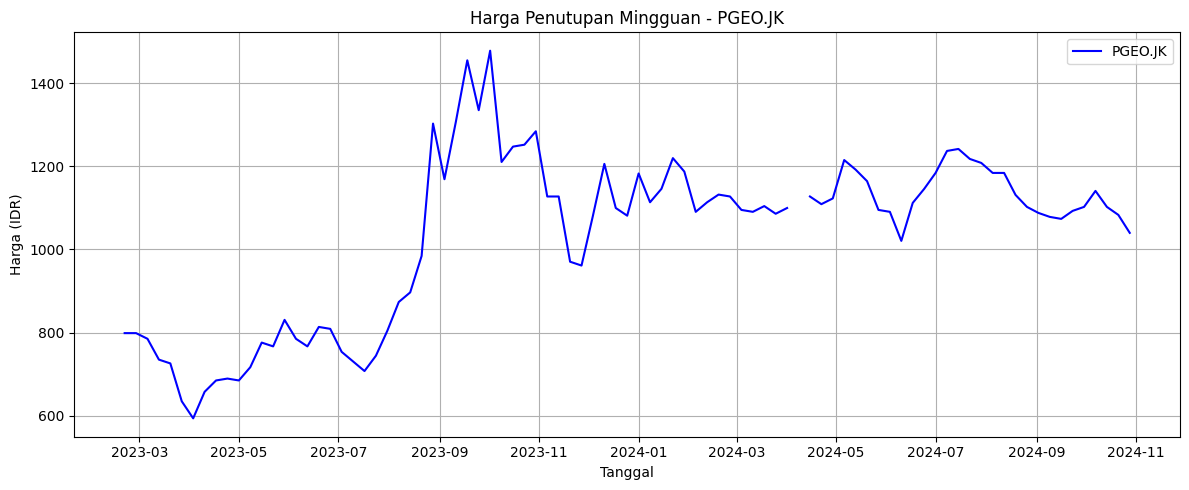

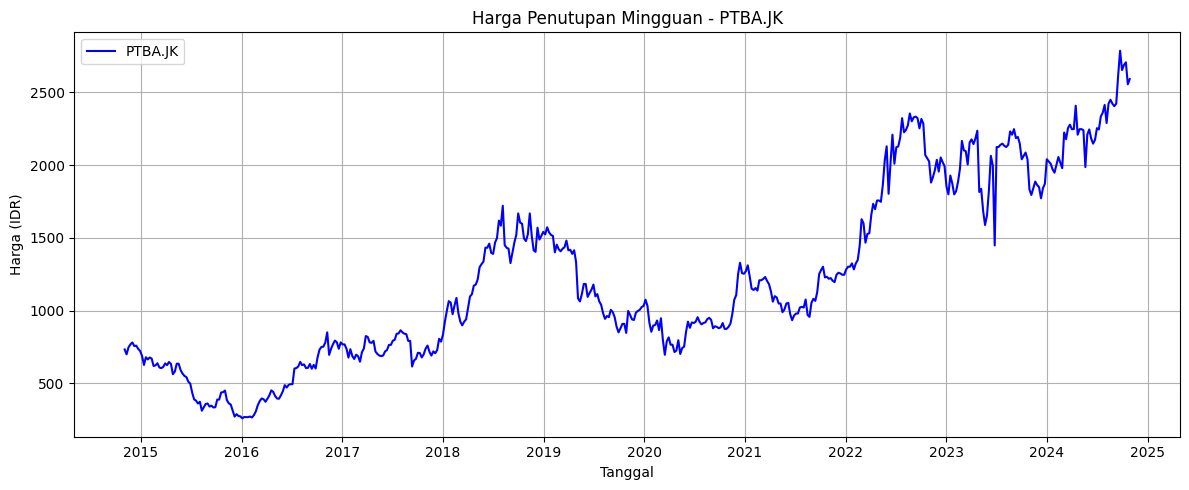

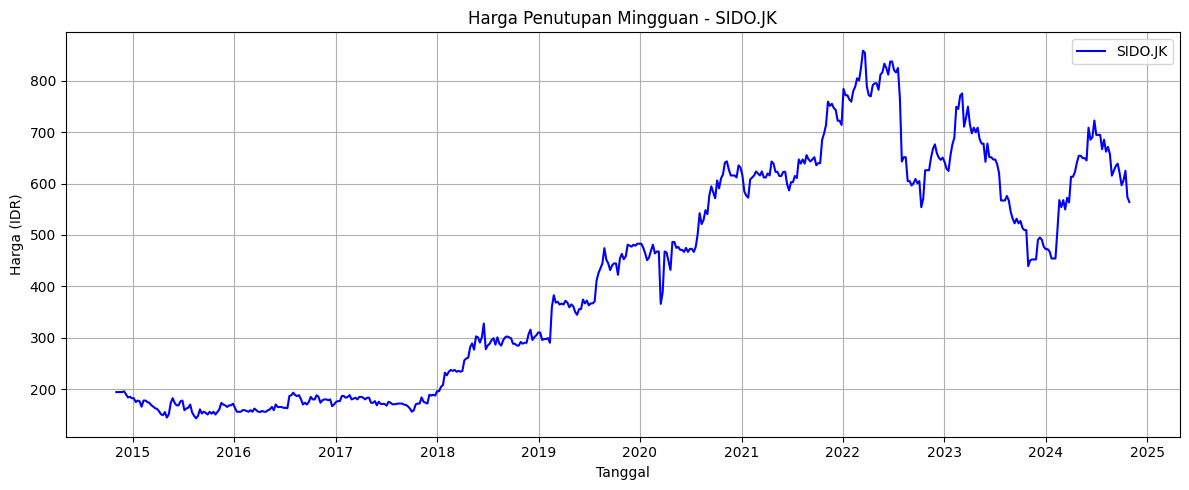

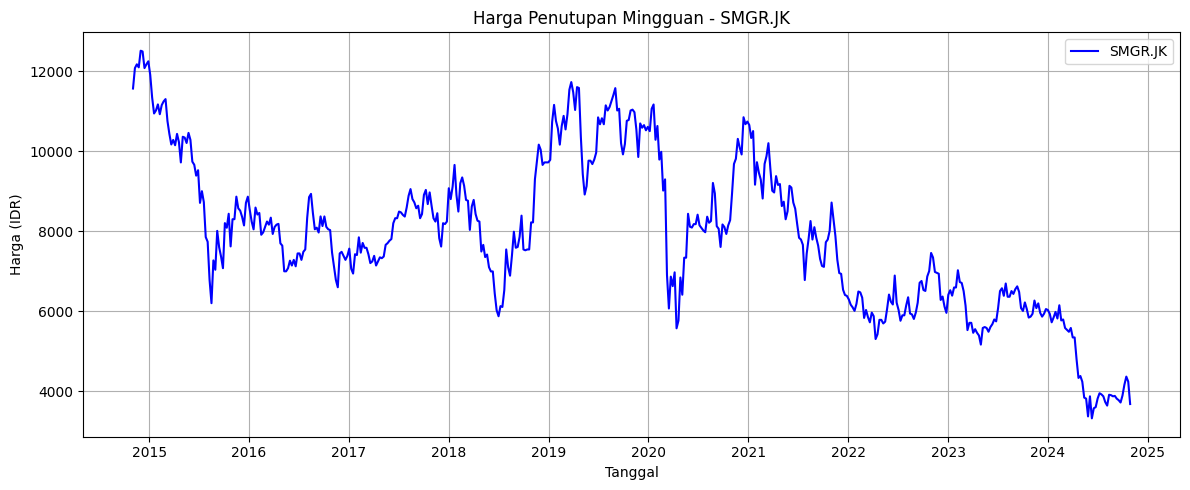

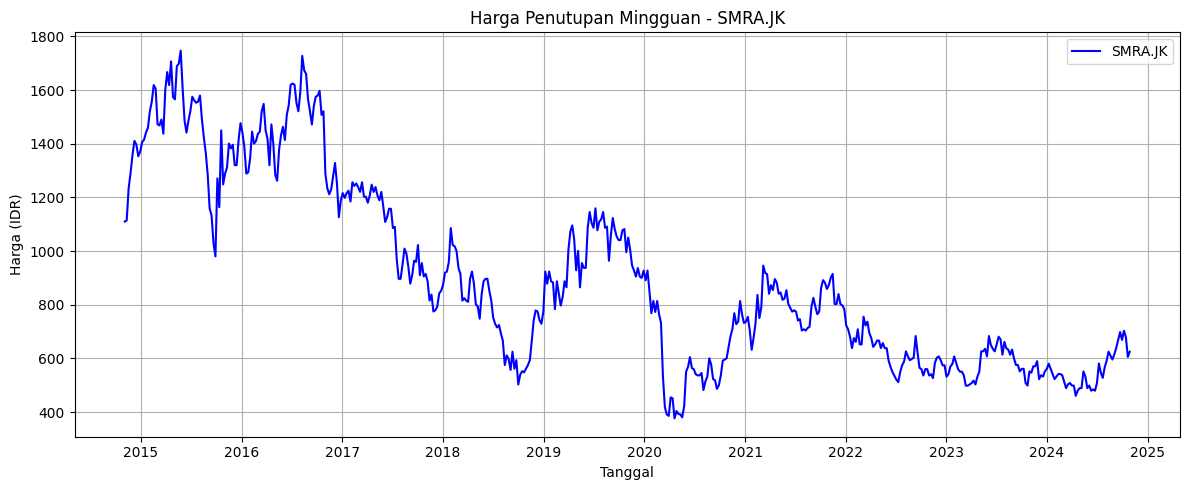

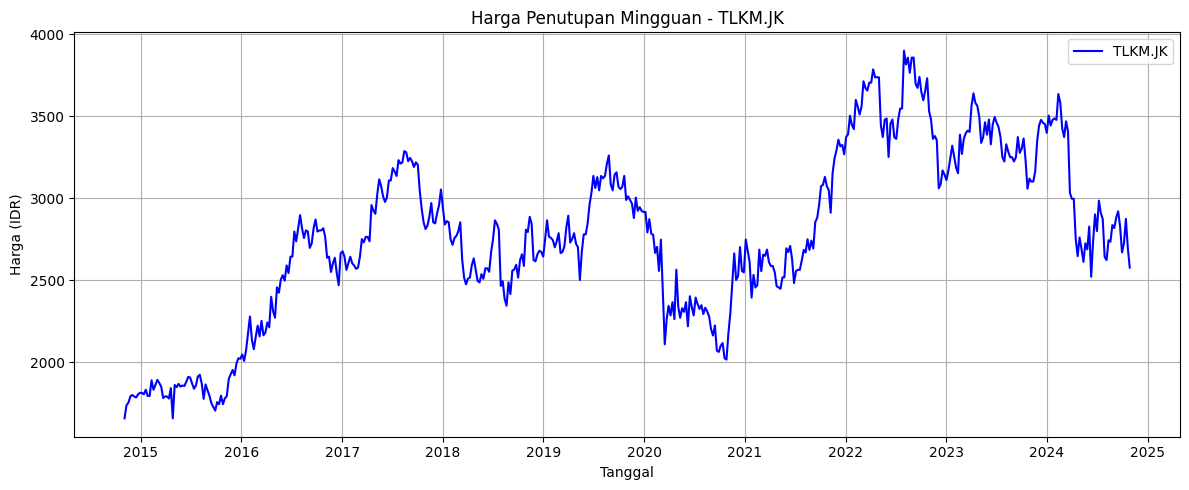

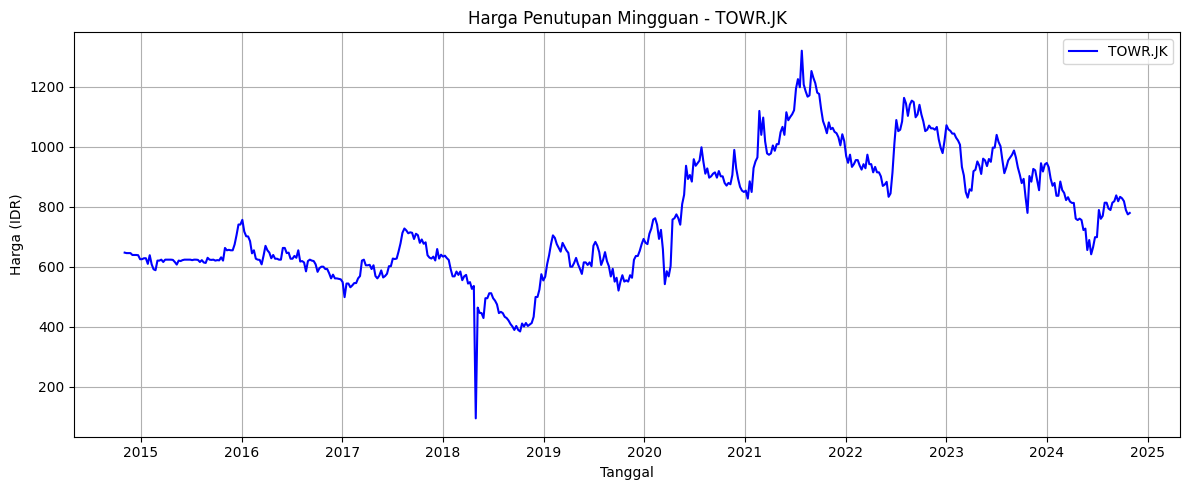

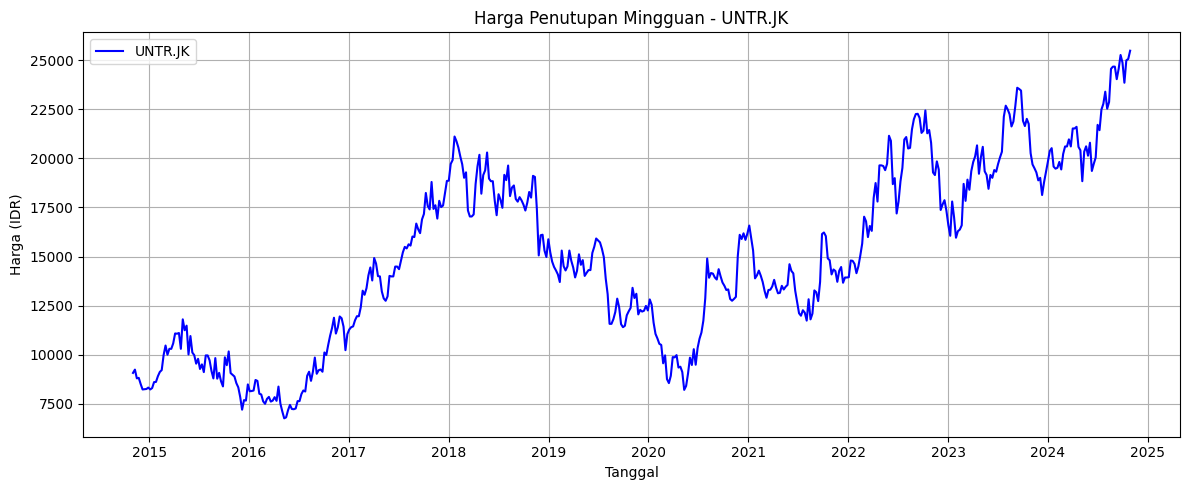

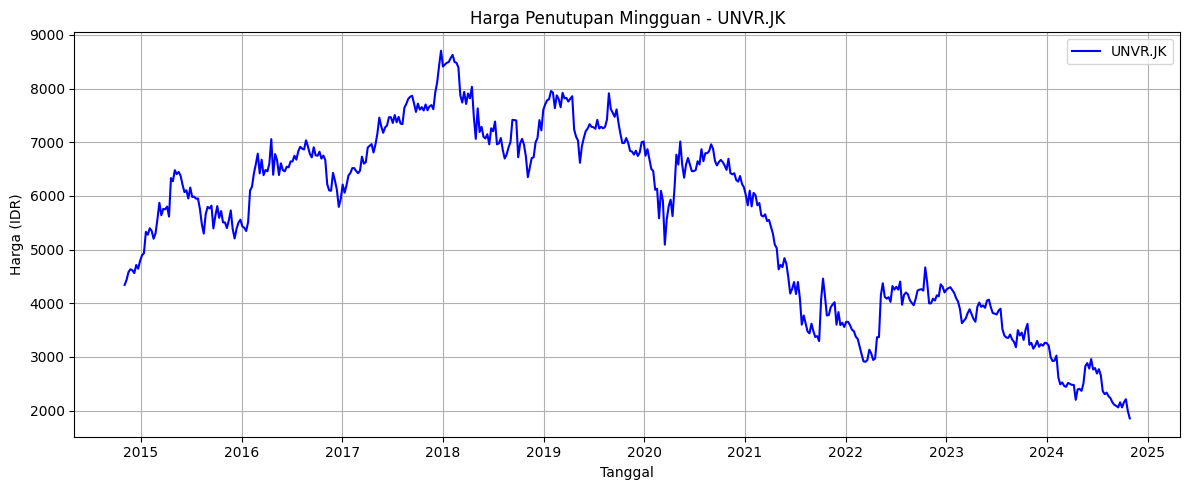

In [3]:
# ===== Tampilkan grafik satu per satu untuk tiap saham =====
for ticker in data.columns:
    plt.figure(figsize=(12, 5))
    plt.plot(data.index, data[ticker], label=ticker, color='blue')
    plt.title(f"Harga Penutupan Mingguan - {ticker}")
    plt.xlabel("Tanggal")
    plt.ylabel("Harga (IDR)")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# **Normalisasi Data**

In [4]:
# Simpan daftar ticker sebelum pembersihan
original_tickers = data.columns.tolist()

# Tampilkan jumlah kolom sebelum pembersihan
print("Jumlah kolom sebelum penanganan data kosong:", len(data.columns))

# Drop kolom yang terlalu banyak data hilang
data_clean = data.dropna(axis=1, thresh=len(data))

# Tampilkan jumlah kolom setelah pembersihan
print("Jumlah kolom setelah penanganan data kosong:", len(data_clean.columns))

# Identifikasi ticker yang di-drop
remaining_tickers = data_clean.columns.tolist()
dropped_tickers = [ticker for ticker in original_tickers if ticker not in remaining_tickers]

# Tampilkan ticker yang di-drop
print("\nSaham yang di-drop karena data tidak lengkap:")
for ticker in dropped_tickers:
    print(f"- {ticker}")

# Gunakan data bersih
data = data_clean

# Membulatkan semua nilai dan ubah ke integer
data = data.round(0).astype(int)

# Simpan data ke file CSV
csv_file_path = 'stock_data_close.csv'
data.to_csv(csv_file_path)

# Tampilkan beberapa baris awal data
print("\nData Saham (Close) setelah dibulatkan:")
print(data.head())

# Tampilkan tipe data untuk konfirmasi integer
print("\nTipe data tiap kolom:")
print(data.dtypes)

Jumlah kolom sebelum penanganan data kosong: 45
Jumlah kolom setelah penanganan data kosong: 35

Saham yang di-drop karena data tidak lengkap:
- ADMR.JK
- AMMN.JK
- ARTO.JK
- BRIS.JK
- BUKA.JK
- GOTO.JK
- MBMA.JK
- MDKA.JK
- MTEL.JK
- PGEO.JK

Data Saham (Close) setelah dibulatkan:
Ticker      ACES.JK  ADRO.JK  AKRA.JK  AMRT.JK  ANTM.JK  ASII.JK  BBCA.JK  \
2014-11-03      577      424      604      471      633     4179     2077   
2014-11-10      584      387      593      471      633     4314     2114   
2014-11-17      599      416      586      467      664     4179     2179   
2014-11-24      591      418      588      471      664     4284     2143   
2014-12-01      580      434      572      458      654     4269     2183   

Ticker      BBNI.JK  BBRI.JK  BBTN.JK  ...  MEDC.JK  PGAS.JK  PTBA.JK  \
2014-11-03     2003     1233      765  ...      603     3362      732   
2014-11-10     2055     1282      768  ...      605     3448      699   
2014-11-17     2020     1294      7

In [39]:
# Menambahkan ESG Score
esg_scores = {
    'ACES.JK': 19.65, 'ADRO.JK': 42.72, 'AKRA.JK': 23.79, 'AMRT.JK': 31.93, 'ANTM.JK': 42.06, 'ASII.JK': 35.6,
    'BBCA.JK': 21.51, 'BBNI.JK': 23.17, 'BBRI.JK': 17.83, 'BBTN.JK': 23.87, 'BMRI.JK': 27.64, 'BRPT.JK': 24.21,
    'CPIN.JK': 44.48, 'ESSA.JK': 49.5, 'EXCL.JK': 27.78, 'ICBP.JK': 34.8, 'INCO.JK': 29.41, 'INDF.JK': 36.06,
    'INKP.JK': 26.44, 'INTP.JK': 27.41, 'ISAT.JK': 29.59, 'ITMG.JK': 33.55, 'JSMR.JK': 10.73, 'KLBF.JK': 33.27,
    'MAPI.JK': 20.31, 'MEDC.JK': 29.08, 'PGAS.JK': 26.32, 'PTBA.JK': 33.87, 'SIDO.JK': 18.45, 'SMGR.JK': 23.05,
    'SMRA.JK': 27.81, 'TLKM.JK': 28.18, 'TOWR.JK': 23.77, 'UNTR.JK': 38.81, 'UNVR.JK': 18.21
}

# Konversi ke DataFrame
esg_df = pd.DataFrame(list(esg_scores.items()), columns=['Ticker', 'ESG_Score'])
# Mengubah data menjadi CSV
# csv_file_path = 'stock_data_esg.csv'
# esg_df.to_csv(csv_file_path)
esg_df


Ticker  ESG_Score
0   ACES.JK      19.65
1   ADRO.JK      42.72
2   AKRA.JK      23.79
3   AMRT.JK      31.93
4   ANTM.JK      42.06
5   ASII.JK      35.60
6   BBCA.JK      21.51
7   BBNI.JK      23.17
8   BBRI.JK      17.83
9   BBTN.JK      23.87
10  BMRI.JK      27.64
11  BRPT.JK      24.21
12  CPIN.JK      44.48
13  ESSA.JK      49.50
14  EXCL.JK      27.78
15  ICBP.JK      34.80
16  INCO.JK      29.41
17  INDF.JK      36.06
18  INKP.JK      26.44
19  INTP.JK      27.41
20  ISAT.JK      29.59
21  ITMG.JK      33.55
22  JSMR.JK      10.73
23  KLBF.JK      33.27
24  MAPI.JK      20.31
25  MEDC.JK      29.08
26  PGAS.JK      26.32
27  PTBA.JK      33.87
28  SIDO.JK      18.45
29  SMGR.JK      23.05
30  SMRA.JK      27.81
31  TLKM.JK      28.18
32  TOWR.JK      23.77
33  UNTR.JK      38.81
34  UNVR.JK      18.21

In [6]:
data.describe()

Ticker      ACES.JK      ADRO.JK      AKRA.JK      AMRT.JK      ANTM.JK  \
count    522.000000   522.000000   522.000000   522.000000   522.000000   
mean     887.701149  1052.101533   814.649425  1188.212644  1034.919540   
std      314.200528   752.437360   309.950924   869.706730   587.346358   
min      340.000000   185.000000   235.000000   417.000000   238.000000   
25%      625.000000   587.750000   583.000000   542.000000   580.000000   
50%      830.000000   730.500000   772.000000   769.000000   720.000000   
75%     1173.750000  1728.000000   966.000000  1639.000000  1600.000000   
max     1516.000000  3452.000000  1664.000000  3435.000000  2574.000000   

Ticker      ASII.JK       BBCA.JK      BBNI.JK      BBRI.JK      BBTN.JK  ...  \
count    522.000000    522.000000   522.000000   522.000000   522.000000  ...   
mean    4576.272031   5212.492337  2959.639847  2714.442529  1383.486590  ...   
std      643.016143   2384.972388   948.882104  1161.630021   465.260314  ...   
min     2491.000000   1950.000000  1366.000000  1012.000000   572.000000  ...   
25%     4170.000000   2982.250000  2109.250000  1664.000000  1113.500000  ...   
50%     4608.000000   5099.000000  2870.000000  2535.500000  1264.500000  ...   
75%     5060.750000   7085.250000  3644.250000  3542.000000  1647.000000  ...   
max     5820.000000  10401.000000  5415.000000  5603.000000  2805.000000  ...   

Ticker      MEDC.JK      PGAS.JK      PTBA.JK     SIDO.JK       SMGR.JK  \
count    522.000000   522.000000   522.000000  522.000000    522.000000   
mean     614.461686  1352.881226  1219.088123  421.622605   7886.906130   
std      322.063470   533.442024   613.781057  217.423248   1932.898919   
min      110.000000   455.000000   259.000000  143.000000   3321.000000   
25%      414.000000  1020.750000   737.000000  182.250000   6433.250000   
50%      531.000000  1296.000000  1054.000000  447.000000   7854.500000   
75%      815.000000  1505.000000  1694.000000  620.000000   9106.500000   
max     1528.000000  3505.000000  2786.000000  859.000000  12508.000000   

Ticker      SMRA.JK      TLKM.JK      TOWR.JK       UNTR.JK     UNVR.JK  
count    522.000000   522.000000   522.000000    522.000000   522.00000  
mean     897.568966  2765.494253   759.603448  14909.764368  5553.41954  
std      346.600291   520.572069   200.747083   4538.391517  1711.98873  
min      376.000000  1659.000000    95.000000   6759.000000  1855.00000  
25%      598.000000  2487.000000   616.500000  11303.500000  4027.25000  
50%      814.000000  2751.500000   690.000000  14478.500000  6015.00000  
75%     1158.000000  3150.000000   928.000000  18846.750000  6914.00000  
max     1747.000000  3898.000000  1320.000000  25482.000000  8707.00000  

[8 rows x 35 columns]

# **2. Saham**

# **Return**

In [7]:
#Mencari Return Stock
return_stock = data.pct_change()
# Menghapus kolom yang mengandung nilai NaN
return_stock_clean = return_stock.dropna()


return_stock_clean


Ticker       ACES.JK   ADRO.JK   AKRA.JK   AMRT.JK   ANTM.JK   ASII.JK  \
2014-11-10  0.012132 -0.087264 -0.018212  0.000000  0.000000  0.032304   
2014-11-17  0.025685  0.074935 -0.011804 -0.008493  0.048973 -0.031293   
2014-11-24 -0.013356  0.004808  0.003413  0.008565  0.000000  0.025126   
2014-12-01 -0.018613  0.038278 -0.027211 -0.027601 -0.015060 -0.003501   
2014-12-08 -0.005172 -0.085253  0.033217 -0.019651  0.004587  0.010541   
...              ...       ...       ...       ...       ...       ...   
2024-09-30 -0.060819 -0.025782  0.041611 -0.015516  0.037857  0.009605   
2024-10-07  0.034869  0.015760 -0.046392  0.006433  0.026153 -0.014376   
2024-10-14  0.056558 -0.023126 -0.061486  0.059764  0.038229 -0.030674   
2024-10-21 -0.026196 -0.031765 -0.024478  0.035887 -0.024548  0.082983   
2024-10-28 -0.016374  0.035593 -0.042066 -0.068996 -0.041060 -0.028811   

Ticker       BBCA.JK   BBNI.JK   BBRI.JK   BBTN.JK  ...   MEDC.JK   PGAS.JK  \
2014-11-10  0.017814  0.025961  0.039740  0.003922  ...  0.003317  0.025580   
2014-11-17  0.030747 -0.017032  0.009360  0.014323  ... -0.004959  0.016531   
2014-11-24 -0.016521  0.043564  0.030912  0.008986  ...  0.018272 -0.032525   
2014-12-01  0.018665  0.024668 -0.004498  0.026718  ... -0.024470  0.008257   
2014-12-08 -0.003665 -0.028241  0.015813  0.008674  ... -0.033445  0.000000   
...              ...       ...       ...       ...  ...       ...       ...   
2024-09-30 -0.016438 -0.022991 -0.046945 -0.064774  ...  0.091918  0.020331   
2024-10-07 -0.009593  0.009413  0.008097  0.062257  ... -0.045718  0.013284   
2024-10-14  0.036146  0.051287  0.014279  0.034432  ... -0.036502  0.003642   
2024-10-21  0.000000  0.000000 -0.040255 -0.020538  ...  0.011839 -0.016691   
2024-10-28 -0.030163 -0.079637 -0.014669 -0.036876  ... -0.031201  0.019926   

Ticker       PTBA.JK   SIDO.JK   SMGR.JK   SMRA.JK   TLKM.JK   TOWR.JK  \
2014-11-10 -0.045082  0.000000  0.044106  0.003604  0.047619 -0.001546   
2014-11-17  0.068670  0.000000  0.007869  0.107720  0.009206  0.000000   
2014-11-24  0.028112  0.000000 -0.006246  0.046191  0.021665  0.000000   
2014-12-01  0.016927  0.010309  0.034403  0.051898  0.005580 -0.009288   
2014-12-08 -0.032010 -0.030612 -0.001519  0.039028 -0.005549  0.000000   
...              ...       ...       ...       ...       ...       ...   
2024-09-30 -0.047739 -0.037097  0.046812 -0.041547 -0.055536 -0.006002   
2024-10-07  0.013570  0.015075  0.069391  0.050822  0.020599 -0.010870   
2024-10-14  0.006322  0.031353  0.048786 -0.034139  0.054679 -0.036630   
2024-10-21 -0.055802 -0.081600 -0.028643 -0.108984 -0.061239 -0.017744   
2024-10-28  0.014090 -0.017422 -0.132107  0.033058 -0.044848  0.006452   

Ticker       UNTR.JK   UNVR.JK  
2014-11-10  0.018519  0.021649  
2014-11-17 -0.048160  0.032913  
2014-11-24  0.002729  0.011131  
2014-12-01 -0.035492 -0.003885  
2014-12-08 -0.032448 -0.011484  
...              ...       ...  
2024-09-30 -0.015357 -0.044104  
2024-10-07 -0.041243  0.046139  
2024-10-14  0.047797  0.026462  
2024-10-21  0.002801 -0.098598  
2024-10-28  0.016799 -0.069242  

[521 rows x 35 columns]

In [8]:
#Expected Return
expected_returns = return_stock.mean()
ExpectedReturns = expected_returns
expected_returns

Ticker
ACES.JK    0.002148
ADRO.JK    0.006091
AKRA.JK    0.002764
AMRT.JK    0.004735
ANTM.JK    0.003837
ASII.JK    0.001137
BBCA.JK    0.003449
BBNI.JK    0.002711
BBRI.JK    0.003247
BBTN.JK    0.002492
BMRI.JK    0.003377
BRPT.JK    0.010870
CPIN.JK    0.002272
ESSA.JK    0.005806
EXCL.JK    0.000127
ICBP.JK    0.002526
INCO.JK    0.002450
INDF.JK    0.001589
INKP.JK    0.006205
INTP.JK   -0.000218
ISAT.JK    0.004636
ITMG.JK    0.004995
JSMR.JK    0.000731
KLBF.JK    0.000988
MAPI.JK    0.019820
MEDC.JK    0.004513
PGAS.JK    0.000153
PTBA.JK    0.004263
SIDO.JK    0.002832
SMGR.JK   -0.000892
SMRA.JK    0.000833
TLKM.JK    0.001460
TOWR.JK    0.007287
UNTR.JK    0.003105
UNVR.JK   -0.000829
dtype: float64

In [9]:
# Mengubah Return Dalam Bentuk Persen
return_stock_percent = expected_returns * 100
return_stock_percent

return_stock_percent_formatted = return_stock_percent.map("{:.2f}%".format)
return_stock_percent_formatted

Ticker
ACES.JK     0.21%
ADRO.JK     0.61%
AKRA.JK     0.28%
AMRT.JK     0.47%
ANTM.JK     0.38%
ASII.JK     0.11%
BBCA.JK     0.34%
BBNI.JK     0.27%
BBRI.JK     0.32%
BBTN.JK     0.25%
BMRI.JK     0.34%
BRPT.JK     1.09%
CPIN.JK     0.23%
ESSA.JK     0.58%
EXCL.JK     0.01%
ICBP.JK     0.25%
INCO.JK     0.25%
INDF.JK     0.16%
INKP.JK     0.62%
INTP.JK    -0.02%
ISAT.JK     0.46%
ITMG.JK     0.50%
JSMR.JK     0.07%
KLBF.JK     0.10%
MAPI.JK     1.98%
MEDC.JK     0.45%
PGAS.JK     0.02%
PTBA.JK     0.43%
SIDO.JK     0.28%
SMGR.JK    -0.09%
SMRA.JK     0.08%
TLKM.JK     0.15%
TOWR.JK     0.73%
UNTR.JK     0.31%
UNVR.JK    -0.08%
dtype: object

# **Resiko**

In [10]:
return_stock.dropna()

Ticker       ACES.JK   ADRO.JK   AKRA.JK   AMRT.JK   ANTM.JK   ASII.JK  \
2014-11-10  0.012132 -0.087264 -0.018212  0.000000  0.000000  0.032304   
2014-11-17  0.025685  0.074935 -0.011804 -0.008493  0.048973 -0.031293   
2014-11-24 -0.013356  0.004808  0.003413  0.008565  0.000000  0.025126   
2014-12-01 -0.018613  0.038278 -0.027211 -0.027601 -0.015060 -0.003501   
2014-12-08 -0.005172 -0.085253  0.033217 -0.019651  0.004587  0.010541   
...              ...       ...       ...       ...       ...       ...   
2024-09-30 -0.060819 -0.025782  0.041611 -0.015516  0.037857  0.009605   
2024-10-07  0.034869  0.015760 -0.046392  0.006433  0.026153 -0.014376   
2024-10-14  0.056558 -0.023126 -0.061486  0.059764  0.038229 -0.030674   
2024-10-21 -0.026196 -0.031765 -0.024478  0.035887 -0.024548  0.082983   
2024-10-28 -0.016374  0.035593 -0.042066 -0.068996 -0.041060 -0.028811   

Ticker       BBCA.JK   BBNI.JK   BBRI.JK   BBTN.JK  ...   MEDC.JK   PGAS.JK  \
2014-11-10  0.017814  0.025961  0.039740  0.003922  ...  0.003317  0.025580   
2014-11-17  0.030747 -0.017032  0.009360  0.014323  ... -0.004959  0.016531   
2014-11-24 -0.016521  0.043564  0.030912  0.008986  ...  0.018272 -0.032525   
2014-12-01  0.018665  0.024668 -0.004498  0.026718  ... -0.024470  0.008257   
2014-12-08 -0.003665 -0.028241  0.015813  0.008674  ... -0.033445  0.000000   
...              ...       ...       ...       ...  ...       ...       ...   
2024-09-30 -0.016438 -0.022991 -0.046945 -0.064774  ...  0.091918  0.020331   
2024-10-07 -0.009593  0.009413  0.008097  0.062257  ... -0.045718  0.013284   
2024-10-14  0.036146  0.051287  0.014279  0.034432  ... -0.036502  0.003642   
2024-10-21  0.000000  0.000000 -0.040255 -0.020538  ...  0.011839 -0.016691   
2024-10-28 -0.030163 -0.079637 -0.014669 -0.036876  ... -0.031201  0.019926   

Ticker       PTBA.JK   SIDO.JK   SMGR.JK   SMRA.JK   TLKM.JK   TOWR.JK  \
2014-11-10 -0.045082  0.000000  0.044106  0.003604  0.047619 -0.001546   
2014-11-17  0.068670  0.000000  0.007869  0.107720  0.009206  0.000000   
2014-11-24  0.028112  0.000000 -0.006246  0.046191  0.021665  0.000000   
2014-12-01  0.016927  0.010309  0.034403  0.051898  0.005580 -0.009288   
2014-12-08 -0.032010 -0.030612 -0.001519  0.039028 -0.005549  0.000000   
...              ...       ...       ...       ...       ...       ...   
2024-09-30 -0.047739 -0.037097  0.046812 -0.041547 -0.055536 -0.006002   
2024-10-07  0.013570  0.015075  0.069391  0.050822  0.020599 -0.010870   
2024-10-14  0.006322  0.031353  0.048786 -0.034139  0.054679 -0.036630   
2024-10-21 -0.055802 -0.081600 -0.028643 -0.108984 -0.061239 -0.017744   
2024-10-28  0.014090 -0.017422 -0.132107  0.033058 -0.044848  0.006452   

Ticker       UNTR.JK   UNVR.JK  
2014-11-10  0.018519  0.021649  
2014-11-17 -0.048160  0.032913  
2014-11-24  0.002729  0.011131  
2014-12-01 -0.035492 -0.003885  
2014-12-08 -0.032448 -0.011484  
...              ...       ...  
2024-09-30 -0.015357 -0.044104  
2024-10-07 -0.041243  0.046139  
2024-10-14  0.047797  0.026462  
2024-10-21  0.002801 -0.098598  
2024-10-28  0.016799 -0.069242  

[521 rows x 35 columns]

In [11]:
#Variansi Manual f
variansi_manual = sum((x - 0.002145) ** 2 for x in return_stock["ACES.JK"].dropna()) / (len(return_stock["ACES.JK"].dropna()) - 1)
variansi_manual

0.002924573066374173

In [12]:
# Hitung standar deviasi manual (akar dari variansi)
std_dev_manual = variansi_manual ** 0.5
std_dev_manual


0.05407932198515596

In [13]:
variansi_stock = return_stock.var()
variansi_stock

Ticker
ACES.JK    0.002925
ADRO.JK    0.004301
AKRA.JK    0.002610
AMRT.JK    0.002190
ANTM.JK    0.004683
ASII.JK    0.001811
BBCA.JK    0.000833
BBNI.JK    0.002060
BBRI.JK    0.001682
BBTN.JK    0.002834
BMRI.JK    0.001667
BRPT.JK    0.008663
CPIN.JK    0.002962
ESSA.JK    0.006995
EXCL.JK    0.003102
ICBP.JK    0.001258
INCO.JK    0.004798
INDF.JK    0.001326
INKP.JK    0.004872
INTP.JK    0.002515
ISAT.JK    0.004891
ITMG.JK    0.004099
JSMR.JK    0.002224
KLBF.JK    0.001525
MAPI.JK    0.167333
MEDC.JK    0.006600
PGAS.JK    0.003682
PTBA.JK    0.003700
SIDO.JK    0.001579
SMGR.JK    0.002598
SMRA.JK    0.003921
TLKM.JK    0.001227
TOWR.JK    0.031856
UNTR.JK    0.002263
UNVR.JK    0.001626
dtype: float64

In [14]:
akar_varians = variansi_stock ** 0.5
akar_varians

Ticker
ACES.JK    0.054079
ADRO.JK    0.065582
AKRA.JK    0.051086
AMRT.JK    0.046802
ANTM.JK    0.068432
ASII.JK    0.042556
BBCA.JK    0.028865
BBNI.JK    0.045385
BBRI.JK    0.041009
BBTN.JK    0.053237
BMRI.JK    0.040827
BRPT.JK    0.093073
CPIN.JK    0.054421
ESSA.JK    0.083633
EXCL.JK    0.055692
ICBP.JK    0.035463
INCO.JK    0.069268
INDF.JK    0.036413
INKP.JK    0.069799
INTP.JK    0.050147
ISAT.JK    0.069937
ITMG.JK    0.064024
JSMR.JK    0.047159
KLBF.JK    0.039053
MAPI.JK    0.409064
MEDC.JK    0.081242
PGAS.JK    0.060683
PTBA.JK    0.060829
SIDO.JK    0.039736
SMGR.JK    0.050967
SMRA.JK    0.062620
TLKM.JK    0.035033
TOWR.JK    0.178484
UNTR.JK    0.047568
UNVR.JK    0.040329
dtype: float64

In [15]:
#Resiko
risk_stock = return_stock.dropna().std()
risk_stock

Ticker
ACES.JK    0.054079
ADRO.JK    0.065582
AKRA.JK    0.051086
AMRT.JK    0.046802
ANTM.JK    0.068432
ASII.JK    0.042556
BBCA.JK    0.028865
BBNI.JK    0.045385
BBRI.JK    0.041009
BBTN.JK    0.053237
BMRI.JK    0.040827
BRPT.JK    0.093073
CPIN.JK    0.054421
ESSA.JK    0.083633
EXCL.JK    0.055692
ICBP.JK    0.035463
INCO.JK    0.069268
INDF.JK    0.036413
INKP.JK    0.069799
INTP.JK    0.050147
ISAT.JK    0.069937
ITMG.JK    0.064024
JSMR.JK    0.047159
KLBF.JK    0.039053
MAPI.JK    0.409064
MEDC.JK    0.081242
PGAS.JK    0.060683
PTBA.JK    0.060829
SIDO.JK    0.039736
SMGR.JK    0.050967
SMRA.JK    0.062620
TLKM.JK    0.035033
TOWR.JK    0.178484
UNTR.JK    0.047568
UNVR.JK    0.040329
dtype: float64

In [16]:
# Convert standard deviation to percentage format
risk_stock_percent = risk_stock * 100
risk_stock_percent
# Format with percentage sign for display
risk_stock_percent_formatted = risk_stock_percent.map("{:.2f}%".format)
risk_stock_percent_formatted

Ticker
ACES.JK     5.41%
ADRO.JK     6.56%
AKRA.JK     5.11%
AMRT.JK     4.68%
ANTM.JK     6.84%
ASII.JK     4.26%
BBCA.JK     2.89%
BBNI.JK     4.54%
BBRI.JK     4.10%
BBTN.JK     5.32%
BMRI.JK     4.08%
BRPT.JK     9.31%
CPIN.JK     5.44%
ESSA.JK     8.36%
EXCL.JK     5.57%
ICBP.JK     3.55%
INCO.JK     6.93%
INDF.JK     3.64%
INKP.JK     6.98%
INTP.JK     5.01%
ISAT.JK     6.99%
ITMG.JK     6.40%
JSMR.JK     4.72%
KLBF.JK     3.91%
MAPI.JK    40.91%
MEDC.JK     8.12%
PGAS.JK     6.07%
PTBA.JK     6.08%
SIDO.JK     3.97%
SMGR.JK     5.10%
SMRA.JK     6.26%
TLKM.JK     3.50%
TOWR.JK    17.85%
UNTR.JK     4.76%
UNVR.JK     4.03%
dtype: object

# **Covarian**

In [17]:
cov_manual = sum((return_stock["AKRA.JK"].dropna() - expected_returns['AKRA.JK']) * (return_stock["ADRO.JK"].dropna() - expected_returns['ADRO.JK'])) / (521 - 1)


cov_pandas = return_stock.cov().iloc[0, 1]

print(f"Kovarian Manual: {cov_manual}")
print(f"Kovarian dari Pandas .cov(): {cov_pandas}")

Kovarian Manual: 0.0010212430952961345
Kovarian dari Pandas .cov(): 0.0006471693778638797


In [18]:
# numPeriods = len(ExcessReturns.index)
# VarCov = ExcessReturns.transpose().dot(ExcessReturns) / ( numPeriods - 1 )
# VarCov
#Covarian
cov_stock = return_stock.cov()
cov_stock

Ticker    ACES.JK   ADRO.JK   AKRA.JK   AMRT.JK   ANTM.JK   ASII.JK   BBCA.JK  \
Ticker                                                                          
ACES.JK  0.002925  0.000647  0.000310  0.000036  0.000501  0.000683  0.000438   
ADRO.JK  0.000647  0.004301  0.001021  0.000045  0.001305  0.000730  0.000650   
AKRA.JK  0.000310  0.001021  0.002610  0.000049  0.000962  0.000521  0.000467   
AMRT.JK  0.000036  0.000045  0.000049  0.002190  0.000152  0.000081  0.000053   
ANTM.JK  0.000501  0.001305  0.000962  0.000152  0.004683  0.000753  0.000557   
ASII.JK  0.000683  0.000730  0.000521  0.000081  0.000753  0.001811  0.000639   
BBCA.JK  0.000438  0.000650  0.000467  0.000053  0.000557  0.000639  0.000833   
BBNI.JK  0.000676  0.001024  0.000663  0.000109  0.000915  0.000890  0.000816   
BBRI.JK  0.000678  0.000927  0.000561 -0.000017  0.000793  0.000921  0.000747   
BBTN.JK  0.000637  0.000712  0.000614  0.000055  0.001084  0.000814  0.000752   
BMRI.JK  0.000552  0.000881  0.000611  0.000054  0.000673  0.000881  0.000745   
BRPT.JK  0.000565  0.000929  0.000677  0.000344  0.001126  0.000201  0.000394   
CPIN.JK  0.000738  0.000776  0.000263  0.000108  0.000767  0.000869  0.000539   
ESSA.JK  0.000374  0.001136  0.000823  0.000089  0.001120  0.000700  0.000261   
EXCL.JK  0.000799  0.000991  0.000499  0.000250  0.000632  0.000552  0.000443   
ICBP.JK  0.000295  0.000267  0.000188 -0.000008  0.000258  0.000419  0.000315   
INCO.JK  0.000514  0.001554  0.001057  0.000293  0.002803  0.000552  0.000583   
INDF.JK  0.000380  0.000451  0.000430 -0.000065  0.000497  0.000533  0.000378   
INKP.JK  0.000664  0.001020  0.000751  0.000187  0.001392  0.000891  0.000614   
INTP.JK  0.000664  0.000716  0.000510 -0.000044  0.000771  0.001024  0.000700   
ISAT.JK  0.000528  0.000580  0.000590  0.000200  0.001417  0.000421  0.000406   
ITMG.JK  0.000282  0.002272  0.000643  0.000182  0.001063  0.000461  0.000472   
JSMR.JK  0.000421  0.000772  0.000668  0.000095  0.000705  0.000765  0.000511   
KLBF.JK  0.000330  0.000578  0.000386  0.000073  0.000368  0.000560  0.000401   
MAPI.JK  0.000064  0.002422  0.001730 -0.000141  0.000220  0.000361  0.001073   
MEDC.JK  0.000414  0.001504  0.001020  0.000152  0.001900  0.000662  0.000607   
PGAS.JK  0.000455  0.001264  0.000729  0.000204  0.001656  0.000950  0.000660   
PTBA.JK  0.000466  0.002307  0.000529  0.000098  0.001414  0.000596  0.000438   
SIDO.JK  0.000344  0.000360  0.000160  0.000025  0.000340  0.000225  0.000245   
SMGR.JK  0.000625  0.000867  0.000596  0.000220  0.000808  0.000996  0.000613   
SMRA.JK  0.000808  0.000804  0.000578 -0.000203  0.001187  0.001169  0.000717   
TLKM.JK  0.000317  0.000382  0.000442  0.000225  0.000567  0.000494  0.000422   
TOWR.JK -0.000090  0.001114  0.000985  0.000089  0.000031  0.000056  0.000478   
UNTR.JK  0.000280  0.001539  0.000413 -0.000047  0.000652  0.000665  0.000334   
UNVR.JK  0.000309  0.000268  0.000210  0.000017  0.000226  0.000399  0.000284   

Ticker    BBNI.JK   BBRI.JK   BBTN.JK  ...   MEDC.JK   PGAS.JK   PTBA.JK  \
Ticker                                 ...                                 
ACES.JK  0.000676  0.000678  0.000637  ...  0.000414  0.000455  0.000466   
ADRO.JK  0.001024  0.000927  0.000712  ...  0.001504  0.001264  0.002307   
AKRA.JK  0.000663  0.000561  0.000614  ...  0.001020  0.000729  0.000529   
AMRT.JK  0.000109 -0.000017  0.000055  ...  0.000152  0.000204  0.000098   
ANTM.JK  0.000915  0.000793  0.001084  ...  0.001900  0.001656  0.001414   
ASII.JK  0.000890  0.000921  0.000814  ...  0.000662  0.000950  0.000596   
BBCA.JK  0.000816  0.000747  0.000752  ...  0.000607  0.000660  0.000438   
BBNI.JK  0.002060  0.001346  0.001443  ...  0.000901  0.001060  0.000721   
BBRI.JK  0.001346  0.001682  0.001072  ...  0.000630  0.000898  0.000672   
BBTN.JK  0.001443  0.001072  0.002834  ...  0.001399  0.001415  0.000711   
BMRI.JK  0.001330  0.001145  0.001101  ...  0.000844  0.000895  0.000638   
BRPT.JK  0.000

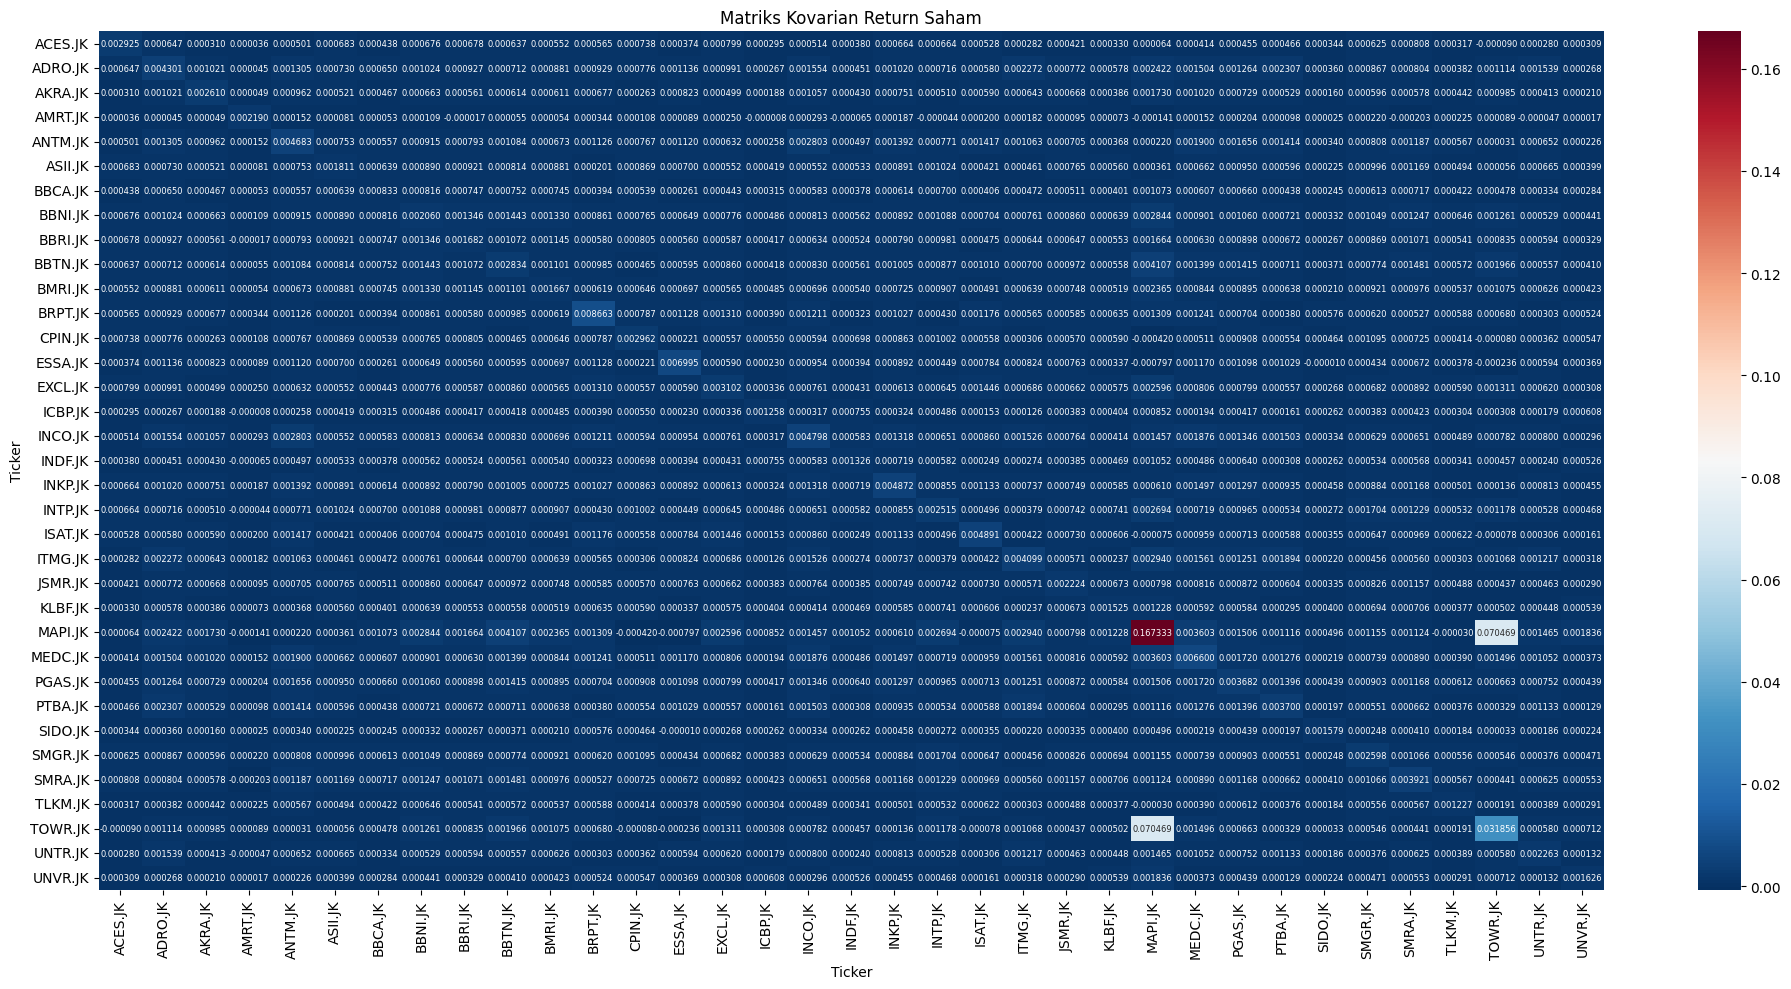

In [19]:
plt.figure(figsize=(20, 10))
sns.heatmap(cov_stock,
            annot=True,  # Menampilkan nilai
            fmt=".6f",   # Format nilai dengan 6 desimal
            cmap="RdBu_r",annot_kws={"size": 6}
            )  # Colormap merah-putih-biru

plt.title("Matriks Kovarian Return Saham")
plt.tight_layout()
plt.show()

In [20]:
var_stock = cov_stock.values.diagonal()
var_stock

array([0.00292457, 0.00430105, 0.00260977, 0.00219039, 0.00468298,
       0.00181102, 0.00083316, 0.00205984, 0.0016817 , 0.00283421,
       0.00166682, 0.00866252, 0.00296169, 0.00699456, 0.00310157,
       0.00125762, 0.00479808, 0.00132593, 0.00487191, 0.0025147 ,
       0.00489116, 0.00409913, 0.00222394, 0.00152511, 0.16733297,
       0.00660018, 0.00368245, 0.00370015, 0.00157892, 0.00259766,
       0.00392128, 0.00122729, 0.03185644, 0.0022627 , 0.00162645])

# **3. Portofolio**

# **Return Portofolio**

In [21]:
weights = np.array([1/35] * 35)
weights  # total harus = 1.0
portfolio_weekly_return = return_stock.dropna().dot(weights)
portfolio_weekly_return

2014-11-10    0.007730
2014-11-17    0.016609
2014-11-24    0.012494
2014-12-01    0.007370
2014-12-08   -0.012337
                ...   
2024-09-30   -0.012791
2024-10-07    0.007504
2024-10-14    0.013734
2024-10-21   -0.022059
2024-10-28   -0.025739
Length: 521, dtype: float64

<Axes: title={'center': 'Cumulative Return Portfolio'}>

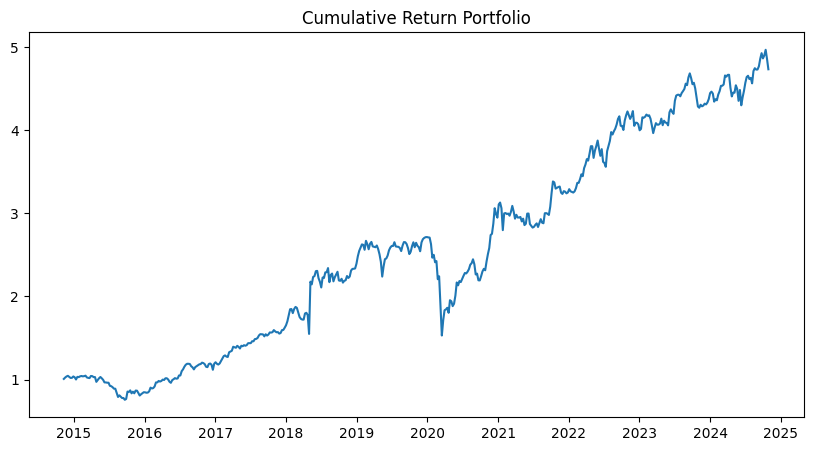

In [22]:
cumulative_return = (1 + portfolio_weekly_return).cumprod()
average_annual_return = portfolio_weekly_return.mean() * 52
cumulative_return.plot(title="Cumulative Return Portfolio", figsize=(10, 5))

# **Resiko Portofolio**

In [23]:
#Resiko Portofolio saham
portfolio_variance = np.dot(weights.T, np.dot(cov_stock, weights))
portfolio_risk = np.sqrt(portfolio_variance)
portfolio_risk

np.float64(0.03191332433389383)

# **4. Implementasi Metode Algoritma Komodo Mlipir**

# **Optimasi Sederhana Menggunakan Algoritma Komodo Mlipir  (50X)**

In [13]:
# --- ALGORITMA KOMODO MLIPIR (SUM OF SQUARES + CONSTRAINT SUM >= 1) ---
class PortfolioOptimizationKomodo:
    def __init__(self, dim, stock_names=None,
                 target_sum=1.0, penalty_coef=1000.0,
                 max_iter=1000, alpha = None, beta=None, gamma=None, num_komodos=None):
        self.dim = dim
        self.stock_names = stock_names or [f"x{i+1}" for i in range(dim)]
        self.target_sum = target_sum
        self.penalty_coef = penalty_coef
        self.max_iter = max_iter
        self.num_komodos = num_komodos or max(30, self.dim * 15)
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma

        # Inisialisasi kandidat awal sum=1
        self.komodos = np.random.dirichlet(np.ones(self.dim), size=self.num_komodos)
        self.fitness_values = np.array([self.fitness(k) for k in self.komodos])
        best_idx = np.argmin(self.fitness_values)
        self.best_komodo = self.komodos[best_idx].copy()
        self.best_fitness = self.fitness_values[best_idx]
        self.territories = self.komodos.copy()

    def repair_solution(self, pos):
        # Pastikan tidak negatif dan normalkan agar sum=1
        pos = np.maximum(pos, 0)
        s = np.sum(pos)
        return pos / s if s > 0 else np.ones(self.dim) / self.dim

    def fitness(self, w):
        # Objective: sum of squares
        obj = np.sum(w ** 2)
        # Penalti kalau sum < target_sum
        penalty = max(0, self.target_sum - np.sum(w))
        return obj + self.penalty_coef * (penalty ** 2)

    def hunting_behavior(self, idx, it):
        t = it / self.max_iter
        current = self.komodos[idx]
        r = np.random.uniform(-1, 1, self.dim)
        u = np.random.rand()
        if u < 0.4:
            new = self.best_komodo + self.alpha * (1 - t) * r * (self.best_komodo - current)
        elif u < 0.7:
            new = current + self.beta * r * (self.territories[idx] - current)
        else:
            j = np.random.choice([i for i in range(self.num_komodos) if i != idx])
            new = current + self.gamma * (2 * t) * r * (self.komodos[j] - current)
        return self.repair_solution(new)

    def optimize(self):
        self.history = []
        self.sum_history = []
        for it in range(self.max_iter):
            for i in range(self.num_komodos):
                new_pos = self.hunting_behavior(i, it)
                new_fit = self.fitness(new_pos)
                if new_fit < self.fitness_values[i]:
                    self.komodos[i] = new_pos
                    self.fitness_values[i] = new_fit
                    if new_fit < self.best_fitness:
                        self.best_fitness = new_fit
                        self.best_komodo = new_pos
                self.territories[i] = self.komodos[i]

            self.history.append(self.best_fitness)
            self.sum_history.append(np.sum(self.best_komodo))

        return {
            'objective_value': np.sum(self.best_komodo ** 2),
            'sum_x': np.sum(self.best_komodo),
            'weights': self.best_komodo
        }

# --- FUNGSI RINGKASAN DAN VISUALISASI ---
def print_summary(optimizer, result):
    print("\n📊 Summary Optimasi Sum-of-Squares")
    print("-" * 50)
    print(f"Objective Value (Sum of Squares): {result['objective_value']:.8f}")
    print(f"Sum of Variables                : {result['sum_x']:.8f}")
    print("-" * 50)

def plot_convergence(optimizer):
    plt.figure(figsize=(10, 5))
    plt.plot(optimizer.history, label="Objective Value")
    plt.xlabel("Iteration")
    plt.ylabel("Objective Value")
    plt.title("Convergence of Komodo Algorithm (Sum-of-Squares)")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    plt.show()

def plot_weights(optimizer):
    weights = optimizer.best_komodo
    names = optimizer.stock_names
    plt.figure(figsize=(14, 6))
    plt.bar(names, weights, color="green")
    plt.title(f"Posisi Terbaik Komodo per Variabel (dim={optimizer.dim})")
    plt.xlabel("Variabel")
    plt.ylabel("Nilai Posisi")
    plt.axhline(1/optimizer.dim, color="red", linestyle="--", label=f"Optimal = {1/optimizer.dim:.3f}")
    plt.legend()
    plt.grid(axis="y", alpha=0.4, linestyle="--")
    plt.show()



# Test parameter  1: Eksploitasi Terlalu Dominan (Terjebak di Optimum Lokal)

Optimasi Komodo MLIPIR - Sum-of-Squares dengan Constraint Sum >= 1
--------------------------------------------------

🔁 Run 1/50
Run 1 - Obj: 0.02857143 | Sum: 1.00000000 | Time: 19.9776s

🔁 Run 2/50
Run 2 - Obj: 0.02857143 | Sum: 1.00000000 | Time: 18.3796s

🔁 Run 3/50
Run 3 - Obj: 0.02857143 | Sum: 1.00000000 | Time: 19.2657s

🔁 Run 4/50
Run 4 - Obj: 0.02857143 | Sum: 1.00000000 | Time: 18.3066s

🔁 Run 5/50
Run 5 - Obj: 0.02857143 | Sum: 1.00000000 | Time: 18.2550s

🔁 Run 6/50
Run 6 - Obj: 0.02857143 | Sum: 1.00000000 | Time: 17.9110s

🔁 Run 7/50
Run 7 - Obj: 0.02857143 | Sum: 1.00000000 | Time: 19.1006s

🔁 Run 8/50
Run 8 - Obj: 0.02857143 | Sum: 1.00000000 | Time: 18.3652s

🔁 Run 9/50
Run 9 - Obj: 0.02857143 | Sum: 1.00000000 | Time: 18.5006s

🔁 Run 10/50
Run 10 - Obj: 0.02857143 | Sum: 1.00000000 | Time: 18.6882s

🔁 Run 11/50
Run 11 - Obj: 0.02857143 | Sum: 1.00000000 | Time: 18.1318s

🔁 Run 12/50
Run 12 - Obj: 0.02857143 | Sum: 1.00000000 | Time: 19.7945s

🔁 Run 13/50
Run 13 - Ob

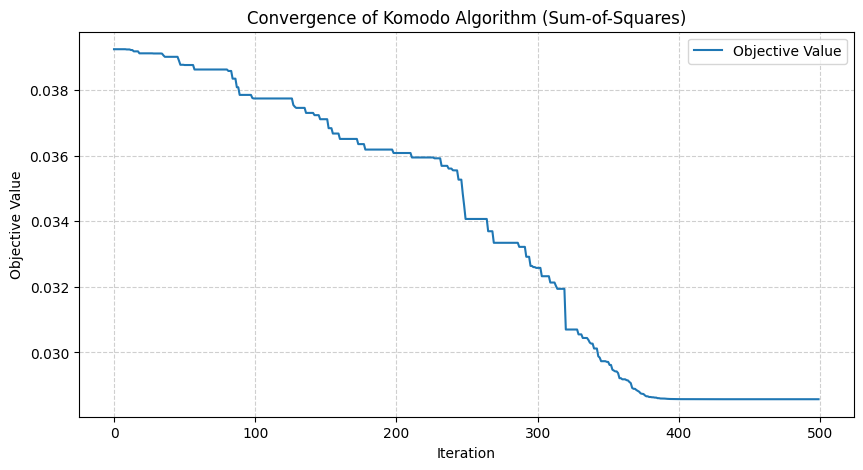

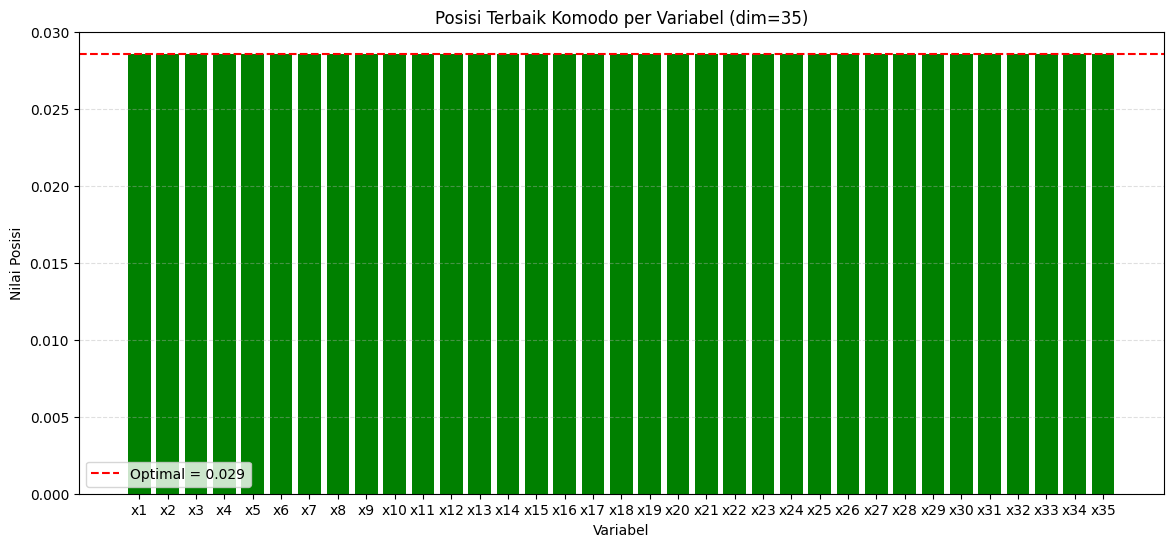


📊 ANALISIS STATISTIK HASIL EKSPERIMEN
Jumlah eksperimen : 2
Dimensi problem    : 35
------------------------------------------------------------
STATISTIK FITNESS:
  Rata-rata (Mean)    : 0.02857143
  Nilai terendah (Min): 0.02857143
  Nilai tertinggi (Max): 0.02857143
  Median              : 0.02857143
  Standard Deviasi    : 0.00000000
  Variansi            : 0.00000000
------------------------------------------------------------
STATISTIK WAKTU KOMPUTASI:
  Rata-rata waktu     : 18.6982 detik
  Waktu tercepat      : 17.7219 detik
  Waktu terlama       : 19.9776 detik
  Total waktu         : 934.91 detik


In [18]:
# --- BLOK EKSEKUSI UTAMA ---
if __name__ == "__main__":
    print("Optimasi Komodo MLIPIR - Sum-of-Squares dengan Constraint Sum >= 1")
    print("-" * 50)

    dim = 35
    names = [f"x{i+1}" for i in range(dim)]

    # Inisialisasi untuk menyimpan hasil dari semua run
    best_fitness = float('inf')
    best_result = None
    best_optimizer = None
    all_best_fitness = []
    all_times = []

    for run in range(1, 51):
        print(f"\n🔁 Run {run}/50")

        start_time = time.time()

        optimizer = PortfolioOptimizationKomodo(dim=dim, stock_names=names,
                                                target_sum=1.0, penalty_coef=1000.0,
                                                max_iter=500, alpha=5.0, beta=0.1, gamma=0.1)
        result = optimizer.optimize()

        end_time = time.time()
        run_time = end_time - start_time

        all_best_fitness.append(result['objective_value'])
        all_times.append(run_time)

        print(f"Run {run} - Obj: {result['objective_value']:.8f} | Sum: {result['sum_x']:.8f} | Time: {run_time:.4f}s")

        if result['objective_value'] < best_fitness:
            best_fitness = result['objective_value']
            best_result = result
            best_optimizer = optimizer

    # Hasil terbaik
    print("\n🏆 Best Result from 50 Runs 🏆")
    print_summary(best_optimizer, best_result)
    plot_convergence(best_optimizer)
    plot_weights(best_optimizer)

    # Tambahan Analisis summary Statistik Lengkap
    num_runs = 2
    variabel = 35

    print("\n📊 ANALISIS STATISTIK HASIL EKSPERIMEN")
    print("=" * 60)
    print(f"Jumlah eksperimen : {num_runs}")
    print(f"Dimensi problem    : {variabel}")
    print("-" * 60)

    # Bagian ini sekarang akan berfungsi karena 'all_best_fitness' sudah berisi data
    print("STATISTIK FITNESS:")
    print(f"  Rata-rata (Mean)    : {np.mean(all_best_fitness):.8f}")
    print(f"  Nilai terendah (Min): {np.min(all_best_fitness):.8f}")
    print(f"  Nilai tertinggi (Max): {np.max(all_best_fitness):.8f}")
    print(f"  Median              : {np.median(all_best_fitness):.8f}")
    print(f"  Standard Deviasi    : {np.std(all_best_fitness):.8f}")
    print(f"  Variansi            : {np.var(all_best_fitness):.8f}")
    print("-" * 60)

    # Bagian ini sekarang akan berfungsi karena 'all_times' sudah berisi data
    print("STATISTIK WAKTU KOMPUTASI:")
    print(f"  Rata-rata waktu     : {np.mean(all_times):.4f} detik")
    print(f"  Waktu tercepat      : {np.min(all_times):.4f} detik")
    print(f"  Waktu terlama       : {np.max(all_times):.4f} detik")
    print(f"  Total waktu         : {np.sum(all_times):.2f} detik")

# Test parameter  2: Eksploitasi yang Optimal

Optimasi Komodo MLIPIR - Sum-of-Squares dengan Constraint Sum >= 1
--------------------------------------------------

🔁 Run 1/50
Run 1 - Obj: 0.02857143 | Sum: 1.00000000 | Time: 38.0181s

🔁 Run 2/50
Run 2 - Obj: 0.02857143 | Sum: 1.00000000 | Time: 37.2549s

🔁 Run 3/50
Run 3 - Obj: 0.02857143 | Sum: 1.00000000 | Time: 36.5792s

🔁 Run 4/50
Run 4 - Obj: 0.02857143 | Sum: 1.00000000 | Time: 37.1763s

🔁 Run 5/50
Run 5 - Obj: 0.02857143 | Sum: 1.00000000 | Time: 37.6809s

🔁 Run 6/50
Run 6 - Obj: 0.02857143 | Sum: 1.00000000 | Time: 37.0502s

🔁 Run 7/50
Run 7 - Obj: 0.02857143 | Sum: 1.00000000 | Time: 37.1865s

🔁 Run 8/50
Run 8 - Obj: 0.02857143 | Sum: 1.00000000 | Time: 36.8572s

🔁 Run 9/50
Run 9 - Obj: 0.02857143 | Sum: 1.00000000 | Time: 36.8366s

🔁 Run 10/50
Run 10 - Obj: 0.02857143 | Sum: 1.00000000 | Time: 37.2112s

🔁 Run 11/50
Run 11 - Obj: 0.02857143 | Sum: 1.00000000 | Time: 37.3242s

🔁 Run 12/50
Run 12 - Obj: 0.02857143 | Sum: 1.00000000 | Time: 36.6072s

🔁 Run 13/50
Run 13 - Ob

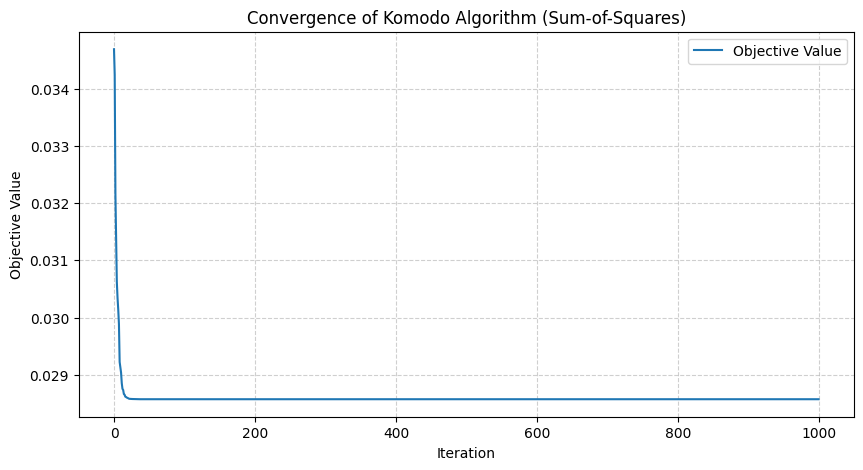

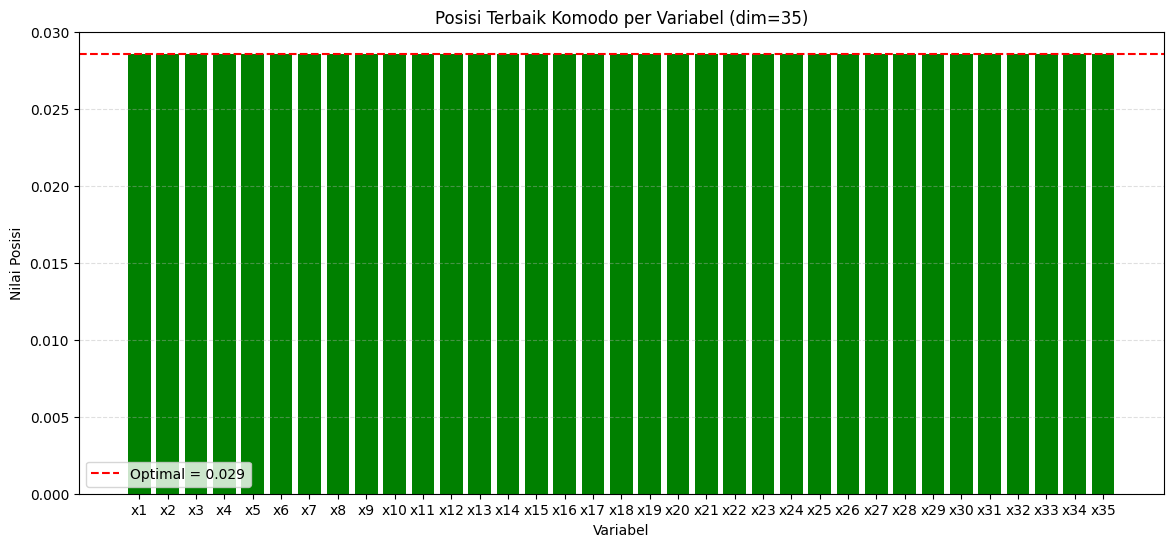


📊 ANALISIS STATISTIK HASIL EKSPERIMEN
Jumlah eksperimen : 2
Dimensi problem    : 35
------------------------------------------------------------
STATISTIK FITNESS:
  Rata-rata (Mean)    : 0.02857143
  Nilai terendah (Min): 0.02857143
  Nilai tertinggi (Max): 0.02857143
  Median              : 0.02857143
  Standard Deviasi    : 0.00000000
  Variansi            : 0.00000000
------------------------------------------------------------
STATISTIK WAKTU KOMPUTASI:
  Rata-rata waktu     : 37.3133 detik
  Waktu tercepat      : 35.6452 detik
  Waktu terlama       : 38.3629 detik
  Total waktu         : 1865.67 detik


In [19]:
# --- BLOK EKSEKUSI UTAMA ---
if __name__ == "__main__":
    print("Optimasi Komodo MLIPIR - Sum-of-Squares dengan Constraint Sum >= 1")
    print("-" * 50)

    dim = 35
    names = [f"x{i+1}" for i in range(dim)]

    # Inisialisasi untuk menyimpan hasil dari semua run
    best_fitness = float('inf')
    best_result = None
    best_optimizer = None
    all_best_fitness = []
    all_times = []

    for run in range(1, 51):
        print(f"\n🔁 Run {run}/50")

        start_time = time.time()

        optimizer = PortfolioOptimizationKomodo(dim=dim, stock_names=names,
                                                target_sum=1.0, penalty_coef=1000.0,
                                                max_iter=1000, alpha=0.9, beta=1.5, gamma=0.5)
        result = optimizer.optimize()

        end_time = time.time()
        run_time = end_time - start_time

        all_best_fitness.append(result['objective_value'])
        all_times.append(run_time)

        print(f"Run {run} - Obj: {result['objective_value']:.8f} | Sum: {result['sum_x']:.8f} | Time: {run_time:.4f}s")

        if result['objective_value'] < best_fitness:
            best_fitness = result['objective_value']
            best_result = result
            best_optimizer = optimizer

    # Hasil terbaik
    print("\n🏆 Best Result from 50 Runs 🏆")
    print_summary(best_optimizer, best_result)
    plot_convergence(best_optimizer)
    plot_weights(best_optimizer)

    # Tambahan Analisis summary Statistik Lengkap
    num_runs = 2
    variabel = 35

    print("\n📊 ANALISIS STATISTIK HASIL EKSPERIMEN")
    print("=" * 60)
    print(f"Jumlah eksperimen : {num_runs}")
    print(f"Dimensi problem    : {variabel}")
    print("-" * 60)

    # Bagian ini sekarang akan berfungsi karena 'all_best_fitness' sudah berisi data
    print("STATISTIK FITNESS:")
    print(f"  Rata-rata (Mean)    : {np.mean(all_best_fitness):.8f}")
    print(f"  Nilai terendah (Min): {np.min(all_best_fitness):.8f}")
    print(f"  Nilai tertinggi (Max): {np.max(all_best_fitness):.8f}")
    print(f"  Median              : {np.median(all_best_fitness):.8f}")
    print(f"  Standard Deviasi    : {np.std(all_best_fitness):.8f}")
    print(f"  Variansi            : {np.var(all_best_fitness):.8f}")
    print("-" * 60)

    # Bagian ini sekarang akan berfungsi karena 'all_times' sudah berisi data
    print("STATISTIK WAKTU KOMPUTASI:")
    print(f"  Rata-rata waktu     : {np.mean(all_times):.4f} detik")
    print(f"  Waktu tercepat      : {np.min(all_times):.4f} detik")
    print(f"  Waktu terlama       : {np.max(all_times):.4f} detik")
    print(f"  Total waktu         : {np.sum(all_times):.2f} detik")

# **Tanpa ESG 20 Kali**

Optimasi Portfolio Komodo MLIPIR (Tanpa Batasan ESG)
--------------------------------------------------

🔁 Run 1/20
Run 1 - Fitness: 0.00038298 | Time: 21.06 sec

🔁 Run 2/20
Run 2 - Fitness: 0.00038298 | Time: 22.30 sec

🔁 Run 3/20
Run 3 - Fitness: 0.00038298 | Time: 22.34 sec

🔁 Run 4/20
Run 4 - Fitness: 0.00038298 | Time: 21.11 sec

🔁 Run 5/20
Run 5 - Fitness: 0.00038298 | Time: 21.83 sec

🔁 Run 6/20
Run 6 - Fitness: 0.00038298 | Time: 21.98 sec

🔁 Run 7/20
Run 7 - Fitness: 0.00038298 | Time: 21.09 sec

🔁 Run 8/20
Run 8 - Fitness: 0.00038298 | Time: 22.12 sec

🔁 Run 9/20
Run 9 - Fitness: 0.00038298 | Time: 22.06 sec

🔁 Run 10/20
Run 10 - Fitness: 0.00038298 | Time: 20.69 sec

🔁 Run 11/20
Run 11 - Fitness: 0.00038298 | Time: 22.14 sec

🔁 Run 12/20
Run 12 - Fitness: 0.00038298 | Time: 22.05 sec

🔁 Run 13/20
Run 13 - Fitness: 0.00038298 | Time: 20.84 sec

🔁 Run 14/20
Run 14 - Fitness: 0.00038298 | Time: 22.09 sec

🔁 Run 15/20
Run 15 - Fitness: 0.00038298 | Time: 21.96 sec

🔁 Run 16/20
R

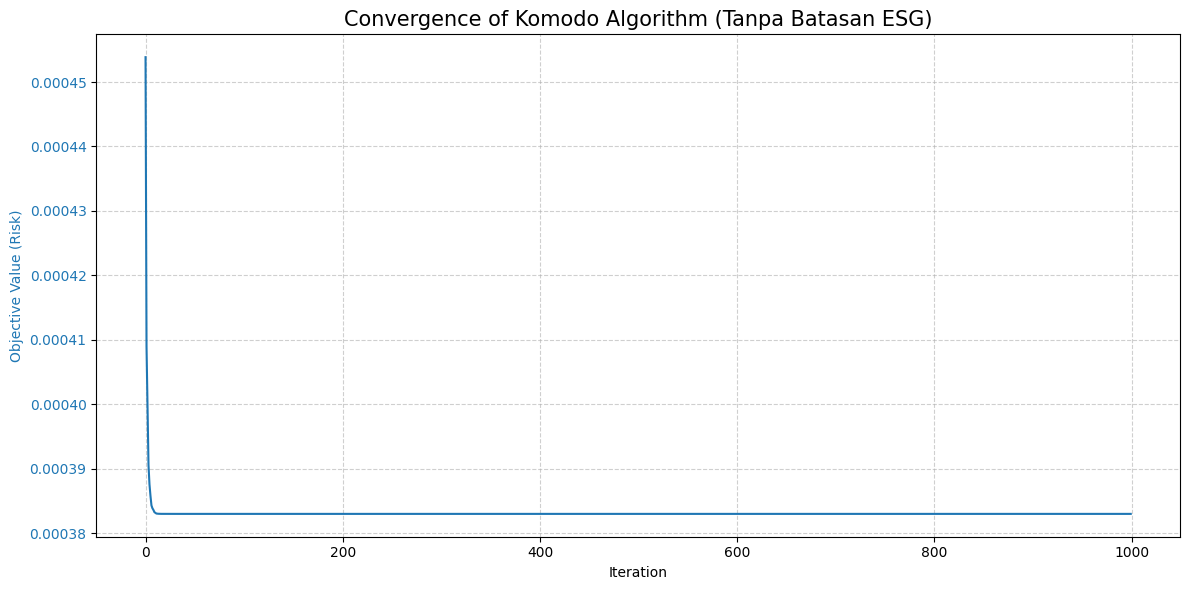

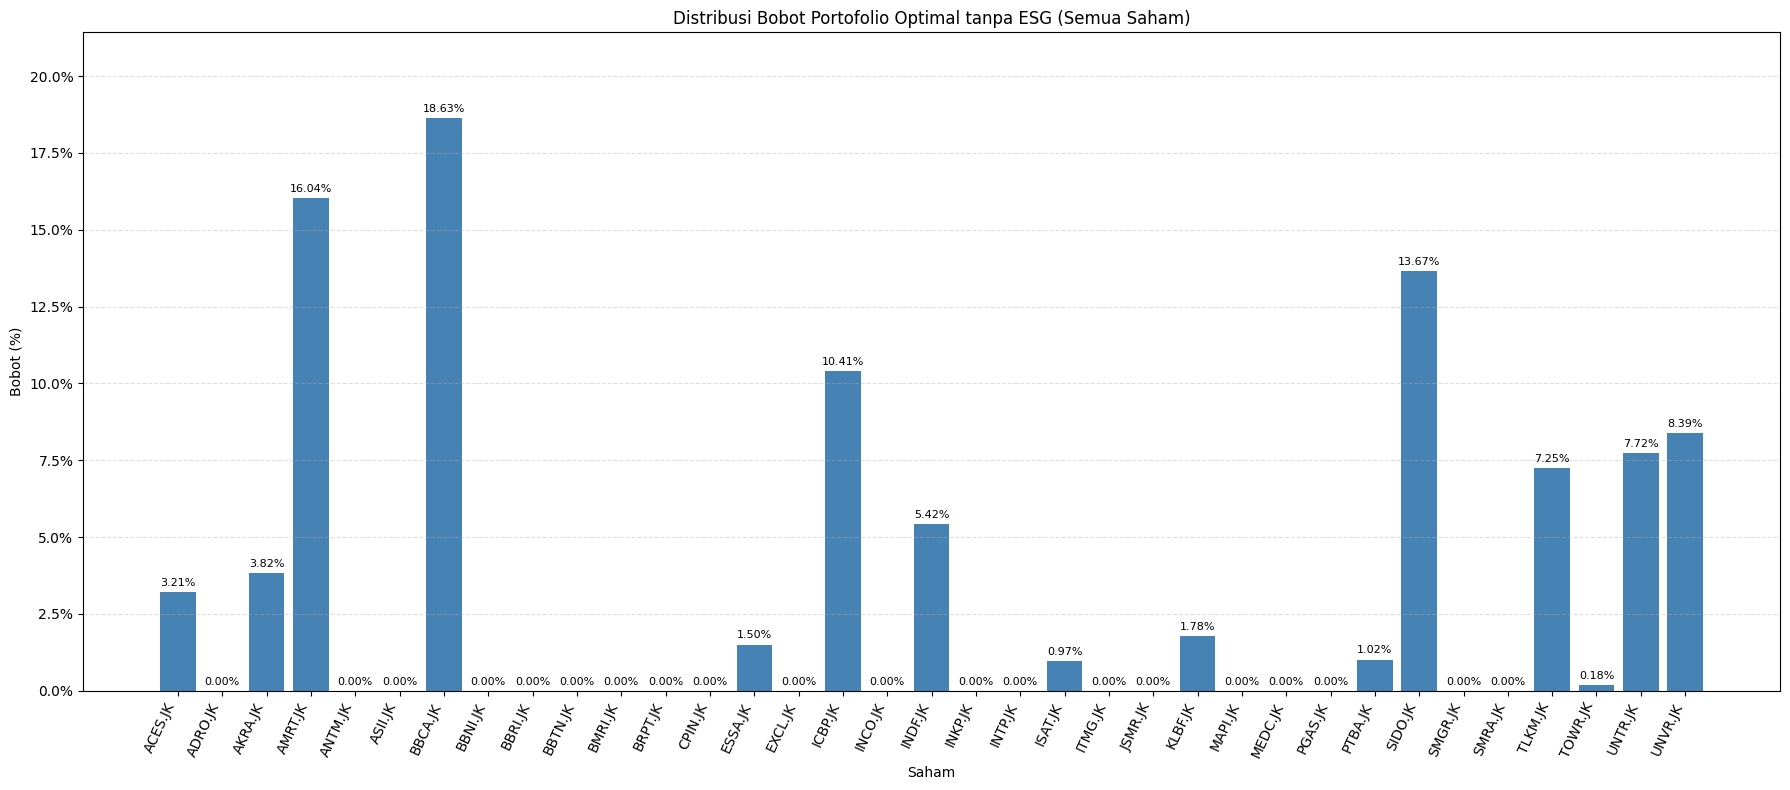

In [42]:
# --- ALGORITMA KOMODO MLIPIR (VERSI TANPA BATASAN ESG) ---
class PortfolioOptimizationKomodo:
  #menginisialisasi semua variabel, parameter, dan populasi solusi acak yang akan digunakan untuk mencari portofolio saham optimal.
    def __init__(self, mu, cov, theta, stock_names, # theta ditambahkan untuk pelaporan
                 mu_p_star=0.0012, max_iter=1000, num_komodos=None):
        self.mu = mu
        self.cov = cov
        self.theta = theta # Disimpan untuk menghitung skor ESG portofolio
        self.stock_names = stock_names
        self.mu_p_star = mu_p_star
        self.dim = len(mu)
        self.max_iter = max_iter
        self.num_komodos = num_komodos or max(30, self.dim * 15)
        self.alpha = 0.9
        self.beta = 1.5
        self.gamma = 0.5
        self.komodos = np.random.dirichlet(np.ones(self.dim), size=self.num_komodos)
        self.fitness_values = np.array([self.fitness(k) for k in self.komodos])
        best_idx = np.argmin(self.fitness_values)
        self.best_komodo = self.komodos[best_idx].copy()
        self.best_fitness = self.fitness_values[best_idx]
        self.territories = self.komodos.copy()

# memastikan setiap solusi portofolio yang dihasilkan oleh algoritma tetap logis dan mematuhi kaidah-kaidah dasar investasi.
    def repair_solution(self, pos):
        pos = np.maximum(pos, 0)
        s = np.sum(pos)
        return pos / s if s > 0 else np.ones(self.dim)/self.dim

#menemukan portofolio dengan risiko paling rendah , dengan syarat wajib memenuhi target minimum imbal hasil
    def fitness(self, w):
        ret = np.dot(w, self.mu)
        var = np.dot(w.T, np.dot(self.cov, w))
        penalty_return = max(0, self.mu_p_star - ret)

        return var + 1000 * penalty_return

# fungsi yang mengimplementasikan logika pergerakan dan pencarian dari Algoritma Komodo untuk menemukan portofolio yang lebih baik
    def hunting_behavior(self, idx, it):
        t = it / self.max_iter
        current = self.komodos[idx]
        r = np.random.uniform(-1, 1, self.dim)
        if np.random.rand() < 0.4:
            new = self.best_komodo + self.alpha*(1 - t)*r*(self.best_komodo - current)
        elif np.random.rand() < 0.7:
            new = current + self.beta*r*(self.territories[idx] - current)
        else:
            j = np.random.choice([i for i in range(self.num_komodos) if i != idx])
            new = current + self.gamma*(2*t)*r*(self.komodos[j] - current)
        return self.repair_solution(new)

    def optimize(self):

        self.history = []
        self.return_history = []
        self.risk_history = []
        self.esg_history = []
        for it in range(self.max_iter):
            for i in range(self.num_komodos):
                new_pos = self.hunting_behavior(i, it)
                new_fit = self.fitness(new_pos)
                if new_fit < self.fitness_values[i]:
                    self.komodos[i] = new_pos
                    self.fitness_values[i] = new_fit
                    if new_fit < self.best_fitness:
                        self.best_fitness = new_fit
                        self.best_komodo = new_pos
                self.territories[i] = self.komodos[i]

            # Melacak semua metrik di setiap iterasi
            self.history.append(self.best_fitness)
            ret = np.dot(self.best_komodo, self.mu)
            risk = np.sqrt(np.dot(self.best_komodo.T, np.dot(self.cov, self.best_komodo)))
            esg = np.dot(self.best_komodo, self.theta)
            self.return_history.append(ret)
            self.risk_history.append(risk)
            self.esg_history.append(esg)

        final_result = {
            'objective_value': self.best_fitness,
            'weights': self.best_komodo,
            'return': self.return_history[-1],
            'risk': self.risk_history[-1],
            'esg': self.esg_history[-1], # ESG ditambahkan ke hasil akhir
        }
        return final_result

    # Fungsi get_sharpe_ratio
    def get_sharpe_ratio(self, risk_free_rate=0):
        port_return = np.dot(self.best_komodo, self.mu)
        port_risk = np.sqrt(np.dot(self.best_komodo.T, np.dot(self.cov, self.best_komodo)))
        if port_risk == 0:
            return 0
        return (port_return - risk_free_rate) / port_risk


# --- FUNGSI RINGKASAN DAN VISUALISASI (disamakan dengan kode ESG) ---
def print_summary(optimizer, result):
    ret = result['return'] * 100
    vol = result['risk'] * 100
    esg = result['esg']
    sharpe = optimizer.get_sharpe_ratio()

    print("\n📊 Portfolio Summary (Tanpa Batasan ESG)")
    print("-" * 50)
    print(f"Expected Weekly Return : {ret:.4f}%")
    print(f"Expected Annual Return : {ret * 52:.2f}%")
    # --- MODIFIKASI: Menambahkan volatilitas tahunan ---
    print(f"Portfolio Volatility (Weekly)  : {vol:.4f}%")
    print(f"Portfolio Volatility (Annual)  : {vol * np.sqrt(52):.2f}%")
    # --- Akhir Modifikasi ---
    print(f"Portfolio ESG Score    : {esg:.2f} (sebagai informasi)")
    print(f"Sharpe Ratio (Weekly)  : {sharpe:.4f}")
    print(f"Sharpe Ratio (Annual)  : {sharpe * np.sqrt(52):.4f}")
    print("-" * 50)
    print(f"Constraint Return ≥ {optimizer.mu_p_star*100:.2f}% : {'✅' if ret/100 >= optimizer.mu_p_star else '❌'}")
    print("-" * 50)

def plot_convergence(optimizer):
    fig, ax1 = plt.subplots(figsize=(12, 6))
    color = 'tab:blue'
    ax1.set_xlabel('Iteration')
    ax1.set_ylabel('Objective Value (Risk)', color=color)
    ax1.plot(optimizer.history, color=color, label='Objective (Risk)')
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.grid(True, linestyle='--', alpha=0.6)
    plt.title('Convergence of Komodo Algorithm (Tanpa Batasan ESG)', fontsize=15)
    fig.tight_layout()
    plt.show()

def plot_weights(optimizer):
    """
    Membuat plot distribusi bobot untuk SEMUA saham dalam portofolio,
    termasuk yang bobotnya 0%.
    """
    weights = optimizer.best_komodo * 100  # dalam persen
    names = optimizer.stock_names

    plt.figure(figsize=(18, 8))
    bars = plt.bar(names, weights, color='steelblue')

    plt.title('Distribusi Bobot Portofolio Optimal tanpa ESG (Semua Saham)')
    plt.xlabel('Saham')
    plt.ylabel('Bobot (%)')

    # Memutar label di sumbu-x agar mudah dibaca
    plt.xticks(rotation=65, ha='right')

    # Format y-axis sebagai persen
    plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())

    # Tambahkan label angka di atas tiap bar
    fmt_labels = [f"{w:.2f}%" for w in weights]
    plt.bar_label(bars, labels=fmt_labels, padding=3, fontsize=8, rotation=0)

    plt.grid(axis='y', alpha=0.4, linestyle='--')

    # Sedikit ruang di atas bar tertinggi supaya label tidak tertutup
    top = max(weights) if len(weights) > 0 else 0
    plt.ylim(top=top * 1.15)

    plt.tight_layout()
    plt.show()



# --- BLOK EKSEKUSI UTAMA ---
if __name__ == "__main__":
    print("Optimasi Portfolio Komodo MLIPIR (Tanpa Batasan ESG)")
    print("-" * 50)

    best_fitness_komodo = float('inf')
    best_weights_komodo = None
    best_result_komodo = None
    best_optimizer_komodo = None
    fitness_list = []
    waktu_list = []

    for run in range(1, 21):
        print(f"\n🔁 Run {run}/20")
        start_time = time.time()
        optimizer = PortfolioOptimizationKomodo(
            mu=expected_returns.values,
            cov=cov_stock.values,
            theta=esg_df['ESG_Score'].values,
            stock_names=esg_df['Ticker'],
            mu_p_star=0.0012,
            max_iter=1000
        )
        result_komodo = optimizer.optimize()
        elapsed = time.time() - start_time
        waktu_list.append(elapsed)
        fitness_list.append(result_komodo['objective_value'])
        print(f"Run {run} - Fitness: {result_komodo['objective_value']:.8f} | Time: {elapsed:.2f} sec")

        # Cek jika ditemukan hasil yang lebih baik
        if result_komodo['objective_value'] < best_fitness_komodo:
            best_fitness_komodo = result_komodo['objective_value']
            best_weights_komodo = result_komodo['weights']
            best_result_komodo = result_komodo
            best_optimizer_komodo = optimizer

    # --- STATISTIK ---
    fitness_array = np.array(fitness_list)
    print("\n" + "_"*70)
    print("STATISTIK FITNESS:")
    print(f"Rata-rata (Mean)    : {np.mean(fitness_array):.8f}")
    print(f"Nilai terendah (Min) : {np.min(fitness_array):.8f}")
    print(f"Nilai tertinggi (Max): {np.max(fitness_array):.8f}")
    print(f"Median              : {np.median(fitness_array):.8f}")
    print(f"Variansi            : {np.var(fitness_array):.8f}")

    waktu_array = np.array(waktu_list)
    print("\n" + "_"*70)
    print("STATISTIK WAKTU KOMPUTASI:")
    print(f"Rata-rata waktu     : {np.mean(waktu_array):.2f} detik")
    print(f"Waktu tercepat      : {np.min(waktu_array):.2f} detik")
    print(f"Waktu terlama       : {np.max(waktu_array):.2f} detik")
    print(f"Total waktu         : {np.sum(waktu_array):.2f} detik")

    # --- HASIL TERBAIK ---
    print("\n\n🏆 Best Result from 20 Runs (Tanpa Batasan ESG) 🏆")
    print(f"Best Fitness (Risk): {best_result_komodo['objective_value']:.8f}")

    # Menggunakan bobot dari optimizer terbaik yang sudah disimpan
    print("Best Weights Allocation:")
    for name, weight in zip(best_optimizer_komodo.stock_names, best_weights_komodo):
            print(f"{name:<12}: {weight*100:.2f}%")

    # --- Visualisasi dari run terbaik ---
    # Gunakan best_result_komodo yang sudah disimpan untuk konsistensi.
    print_summary(best_optimizer_komodo, best_result_komodo)
    plot_convergence(best_optimizer_komodo)
    plot_weights(best_optimizer_komodo)

# **Dengan ESG 20 Kali**

Optimasi Portfolio Komodo MLIPIR dengan ESG
--------------------------------------------------

🔁 Run 1/20
Run 1 - Fitness: 0.00046866 | Time: 21.96 sec

🔁 Run 2/20
Run 2 - Fitness: 0.00046863 | Time: 23.25 sec

🔁 Run 3/20
Run 3 - Fitness: 0.00046855 | Time: 23.47 sec

🔁 Run 4/20
Run 4 - Fitness: 0.00046865 | Time: 23.26 sec

🔁 Run 5/20
Run 5 - Fitness: 0.00046871 | Time: 22.87 sec

🔁 Run 6/20
Run 6 - Fitness: 0.00046869 | Time: 22.73 sec

🔁 Run 7/20
Run 7 - Fitness: 0.00046902 | Time: 23.18 sec

🔁 Run 8/20
Run 8 - Fitness: 0.00046861 | Time: 23.37 sec

🔁 Run 9/20
Run 9 - Fitness: 0.00046862 | Time: 23.30 sec

🔁 Run 10/20
Run 10 - Fitness: 0.00046869 | Time: 22.30 sec

🔁 Run 11/20
Run 11 - Fitness: 0.00046880 | Time: 23.54 sec

🔁 Run 12/20
Run 12 - Fitness: 0.00046862 | Time: 23.23 sec

🔁 Run 13/20
Run 13 - Fitness: 0.00046863 | Time: 23.07 sec

🔁 Run 14/20
Run 14 - Fitness: 0.00046868 | Time: 22.15 sec

🔁 Run 15/20
Run 15 - Fitness: 0.00046864 | Time: 23.13 sec

🔁 Run 16/20
Run 16 - F

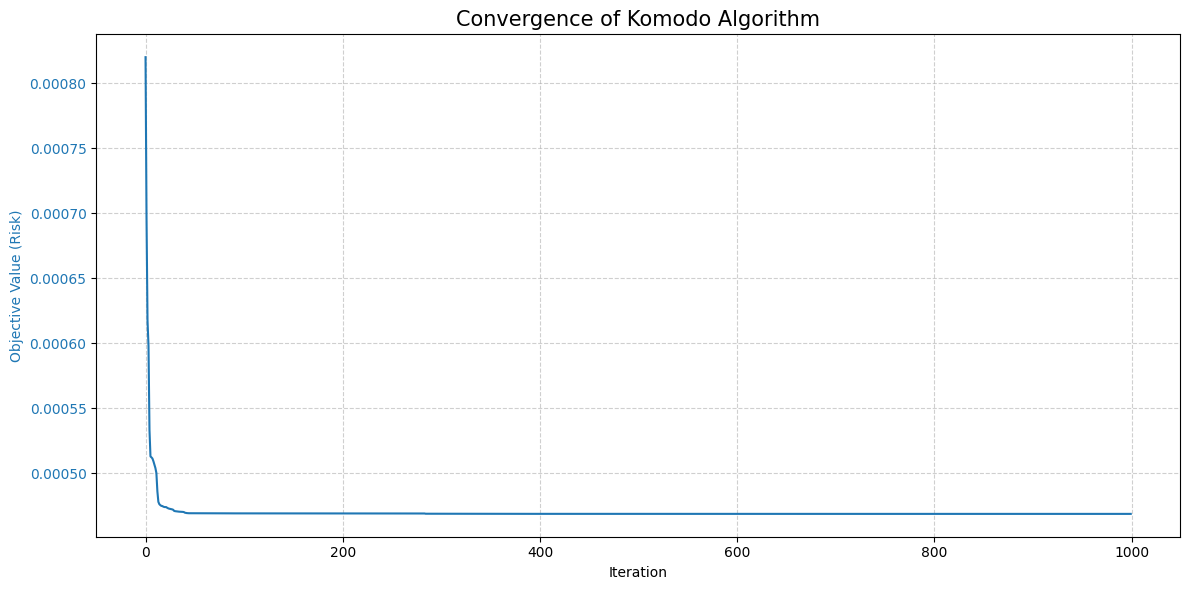

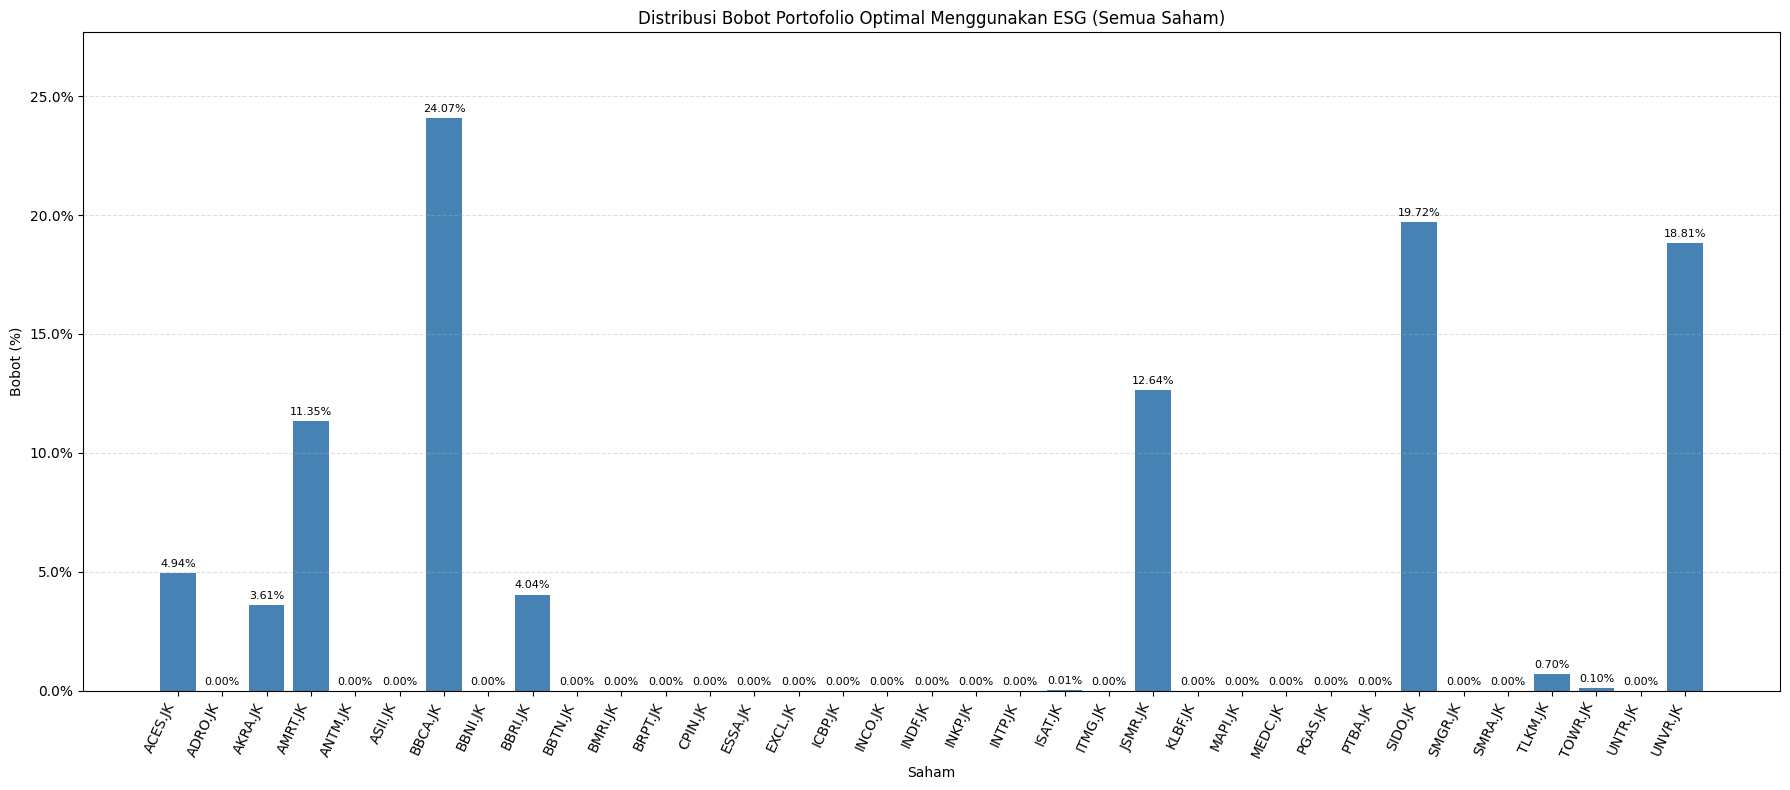

In [46]:
# --- ALGORITMA KOMODO MLIPIR ---
class PortfolioOptimizationKomodoESG:
#fase persiapan yang menginisialisasi semua variabel, parameter, dan populasi solusi acak yang akan digunakan untuk mencari portofolio saham optimal.
    def __init__(self, mu, cov, theta, stock_names,
                 mu_p_star=0.0012, theta_p_star=20, max_iter=1000, num_komodos=None):
        self.mu = mu
        self.cov = cov
        self.theta = theta
        self.stock_names = stock_names
        self.mu_p_star = mu_p_star
        self.theta_p_star = theta_p_star
        self.dim = len(mu)
        self.max_iter = max_iter
        self.num_komodos = num_komodos or max(30, self.dim * 15)
        self.alpha = 0.9
        self.beta = 1.5
        self.gamma = 0.5
        self.komodos = np.random.dirichlet(np.ones(self.dim), size=self.num_komodos)
        self.fitness_values = np.array([self.fitness(k) for k in self.komodos])
        best_idx = np.argmin(self.fitness_values)
        self.best_komodo = self.komodos[best_idx].copy()
        self.best_fitness = self.fitness_values[best_idx]
        self.territories = self.komodos.copy()

#memastikan setiap solusi portofolio yang dihasilkan oleh algoritma tetap logis dan mematuhi kaidah-kaidah dasar investasi.
    def repair_solution(self, pos):
        pos = np.maximum(pos, 0)
        s = np.sum(pos)
        return pos / s if s > 0 else np.ones(self.dim)/self.dim

#untuk menemukan portofolio dengan risiko paling rendah , dengan syarat wajib memenuhi target minimum imbal hasil
    def fitness(self, w):
        ret = np.dot(w, self.mu)
        var = np.dot(w.T, np.dot(self.cov, w))
        esg = np.dot(w, self.theta)
        penalty_return = max(0, self.mu_p_star - ret)
        penalty_esg = max(0, esg - self.theta_p_star)
        return var + 1000 * (penalty_return + penalty_esg)

#fungsi yang mengimplementasikan logika pergerakan dan pencarian dari Algoritma Komodo untuk menemukan portofolio yang lebih baik
    def hunting_behavior(self, idx, it):
        t = it / self.max_iter
        current = self.komodos[idx]
        r = np.random.uniform(-1, 1, self.dim)
        if np.random.rand() < 0.4:
            new = self.best_komodo + self.alpha*(1 - t)*r*(self.best_komodo - current)
        elif np.random.rand() < 0.7:
            new = current + self.beta*r*(self.territories[idx] - current)
        else:
            j = np.random.choice([i for i in range(self.num_komodos) if i != idx])
            new = current + self.gamma*(2*t)*r*(self.komodos[j] - current)
        return self.repair_solution(new)

    def optimize(self):
        self.history = []
        self.return_history = []
        self.risk_history = []
        self.esg_history = []
        for it in range(self.max_iter):
            for i in range(self.num_komodos):
                new_pos = self.hunting_behavior(i, it)
                new_fit = self.fitness(new_pos)
                if new_fit < self.fitness_values[i]:
                    self.komodos[i] = new_pos
                    self.fitness_values[i] = new_fit
                    if new_fit < self.best_fitness:
                        self.best_fitness = new_fit
                        self.best_komodo = new_pos
                self.territories[i] = self.komodos[i]
            self.history.append(self.best_fitness)
            ret = np.dot(self.best_komodo, self.mu)
            risk = np.sqrt(np.dot(self.best_komodo.T, np.dot(self.cov, self.best_komodo)))
            esg = np.dot(self.best_komodo, self.theta)
            self.return_history.append(ret)
            self.risk_history.append(risk)
            self.esg_history.append(esg)
        final_result = {
            'objective_value': self.best_fitness,
            'weights': self.best_komodo,
            'return': self.return_history[-1],
            'risk': self.risk_history[-1],
            'esg': self.esg_history[-1],
        }
        return final_result

    def get_sharpe_ratio(self, risk_free_rate=0):
        port_return = np.dot(self.best_komodo, self.mu)
        port_risk = np.sqrt(np.dot(self.best_komodo.T, np.dot(self.cov, self.best_komodo)))
        if port_risk == 0:
            return 0
        return (port_return - risk_free_rate) / port_risk

# --- FUNGSI RINGKASAN DAN VISUALISASI ---
def print_summary(optimizer, result):
    ret = result['return'] * 100
    vol = result['risk'] * 100
    esg = result['esg']
    sharpe = optimizer.get_sharpe_ratio()

    print("\n📊 Portfolio Summary")
    print("-" * 50)
    print(f"Expected Weekly Return : {ret:.4f}%")
    print(f"Expected Annual Return : {ret * 52:.2f}%")
    # --- MODIFIKASI: Menambahkan volatilitas tahunan ---
    print(f"Portfolio Volatility (Weekly)  : {vol:.4f}%")
    print(f"Portfolio Volatility (Annual)  : {vol * np.sqrt(52):.2f}%")
    # --- Akhir Modifikasi ---
    print(f"Portfolio ESG Score    : {esg:.2f}")
    print(f"Sharpe Ratio (Weekly)  : {sharpe:.4f}")
    print(f"Sharpe Ratio (Annual)  : {sharpe * np.sqrt(52):.4f}")
    print("-" * 50)
    print(f"Constraint Return ≥ {optimizer.mu_p_star*100:.2f}% : {'✅' if ret/100 >= optimizer.mu_p_star else '❌'}")
    print(f"Constraint ESG ≤ {optimizer.theta_p_star}       : {'✅' if esg <= optimizer.theta_p_star else '❌'}")
    print("-" * 50)

def plot_convergence(optimizer):
    fig, ax1 = plt.subplots(figsize=(12, 6))
    color = 'tab:blue'
    ax1.set_xlabel('Iteration')
    ax1.set_ylabel('Objective Value (Risk)', color=color)
    ax1.plot(optimizer.history, color=color, label='Objective (Risk)')
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.grid(True, linestyle='--', alpha=0.6)
    plt.title('Convergence of Komodo Algorithm', fontsize=15)
    fig.tight_layout()
    plt.show()

def plot_weights(optimizer):

    weights = optimizer.best_komodo * 100  # dalam persen
    names = optimizer.stock_names

    plt.figure(figsize=(18, 8))
    bars = plt.bar(names, weights, color='steelblue')

    plt.title('Distribusi Bobot Portofolio Optimal Menggunakan ESG (Semua Saham)')
    plt.xlabel('Saham')
    plt.ylabel('Bobot (%)')

    # Memutar label di sumbu-x agar mudah dibaca
    plt.xticks(rotation=65, ha='right')

    # Format y-axis sebagai persen
    plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())

    # Tambahkan label angka di atas tiap bar
    fmt_labels = [f"{w:.2f}%" for w in weights]
    plt.bar_label(bars, labels=fmt_labels, padding=3, fontsize=8, rotation=0)

    plt.grid(axis='y', alpha=0.4, linestyle='--')

    # Sedikit ruang di atas bar tertinggi supaya label tidak tertutup
    top = max(weights) if len(weights) > 0 else 0
    plt.ylim(top=top * 1.15)

    plt.tight_layout()
    plt.show()


# --- BLOK EKSEKUSI UTAMA ---
if __name__ == "__main__":
    print("Optimasi Portfolio Komodo MLIPIR dengan ESG")
    print("-" * 50)

    best_fitness_komodo_ESG = float('inf')
    best_weights_komodo_ESG = None
    best_result_komodo_ESG = None
    best_optimizer_komodo_ESG = None

    fitness_list = []
    waktu_list = []

    for run in range(1, 21):
        print(f"\n🔁 Run {run}/20")
        start_time = time.time()
        optimizer = PortfolioOptimizationKomodoESG(
            mu=expected_returns.values,
            cov=cov_stock.values,
            theta=esg_df['ESG_Score'].values,
            stock_names=esg_df['Ticker'].values,
            mu_p_star=0.0012,
            theta_p_star=20,
            max_iter=1000
        )
        result_komodo_ESG = optimizer.optimize()
        elapsed = time.time() - start_time
        waktu_list.append(elapsed)
        fitness_list.append(result_komodo_ESG['objective_value'])
        print(f"Run {run} - Fitness: {result_komodo_ESG['objective_value']:.8f} | Time: {elapsed:.2f} sec")
        if result_komodo_ESG['objective_value'] < best_fitness_komodo_ESG:
            best_fitness_komodo_ESG = result_komodo_ESG['objective_value']
            best_weights_komodo_ESG = result_komodo_ESG['weights']
            best_result_komodo_ESG = result_komodo_ESG
            best_optimizer_komodo_ESG = optimizer

    # --- STATISTIK ---
    fitness_array = np.array(fitness_list)
    print("\n" + "_"*70)
    print("STATISTIK FITNESS:")
    print(f"Rata-rata (Mean)    : {np.mean(fitness_array):.8f}")
    print(f"Nilai terendah (Min) : {np.min(fitness_array):.8f}")
    print(f"Nilai tertinggi (Max): {np.max(fitness_array):.8f}")
    print(f"Median              : {np.median(fitness_array):.8f}")
    print(f"Variansi            : {np.var(fitness_array):.8f}")

    waktu_array = np.array(waktu_list)
    print("\n" + "_"*70)
    print("STATISTIK WAKTU KOMPUTASI:")
    print(f"Rata-rata waktu     : {np.mean(waktu_array):.2f} detik")
    print(f"Waktu tercepat      : {np.min(waktu_array):.2f} detik")
    print(f"Waktu terlama       : {np.max(waktu_array):.2f} detik")
    print(f"Total waktu         : {np.sum(waktu_array):.2f} detik")

    # --- HASIL TERBAIK ---
    print("\n\n🏆 Best Result from 20 Runs 🏆")
    print(f"Best Fitness (Risk): {best_fitness_komodo_ESG:.8f}")
    print("Best Weights Allocation with ESG:")
    for name, weight in zip(best_optimizer_komodo_ESG.stock_names, best_weights_komodo_ESG):
            print(f"{name:<12}: {weight*100:.2f}%")

    # --- Visualisasi dari run terbaik ---
    print_summary(best_optimizer_komodo_ESG, best_result_komodo_ESG)
    plot_convergence(best_optimizer_komodo_ESG)
    plot_weights(best_optimizer_komodo_ESG)

# **Membandingkan ESG, Tanpa ESG dan LQ 45**

[*********************100%***********************]  36 of 36 completed



📊 Rangkuman Kinerja Portofolio vs LQ45 (2022–2024) 📊
Risk-Free Rate yang Digunakan (Tahunan): 6.65%
-----------------------------------------------------------------------------
                                     ESG      Tanpa ESG     LQ45
-----------------------------------------------------------------------------
Expected Annual Return (%)        :   13.04      16.77       1.93
Annualized Volatility (%)         :   11.78      10.38      12.84
Sharpe Ratio (Annual)             :    0.56       0.99      -0.35
Skor ESG (rata-rata tertimbang)   :   20.00      28.72      28.71
-----------------------------------------------------------------------------


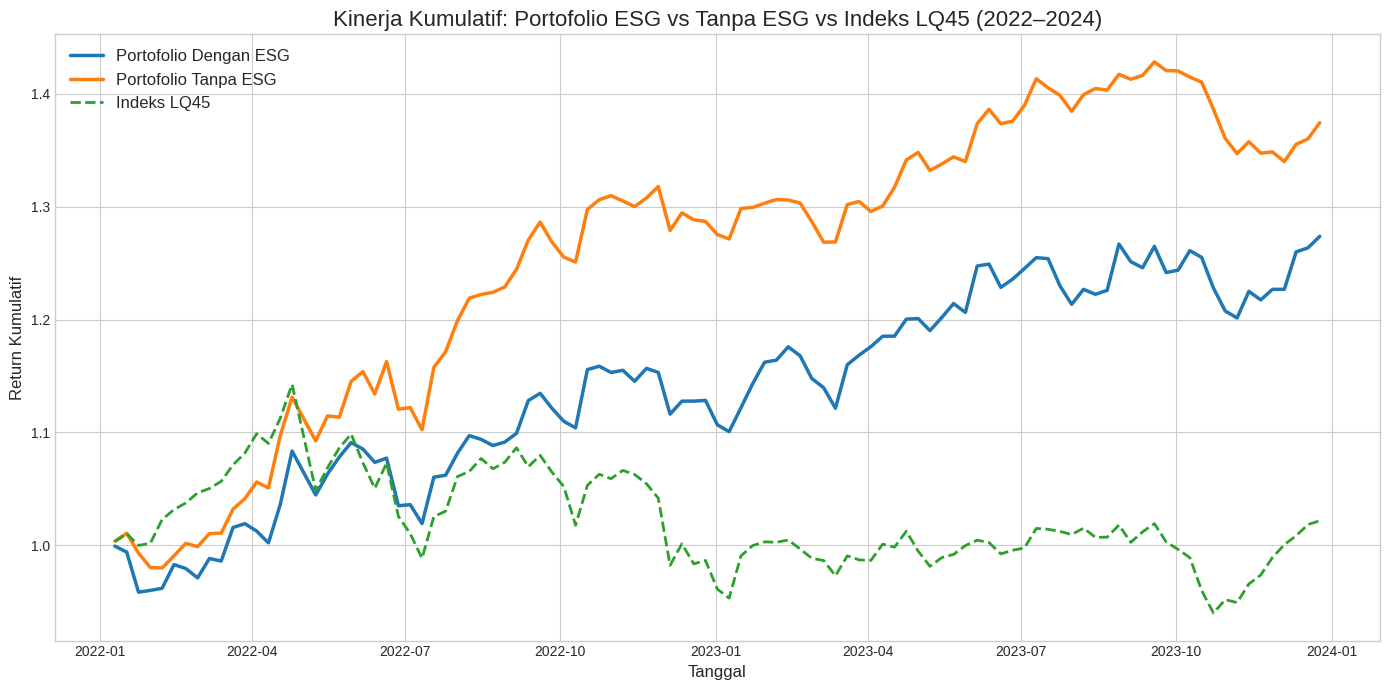


--- Analisis Alokasi Portofolio Dengan ESG ---


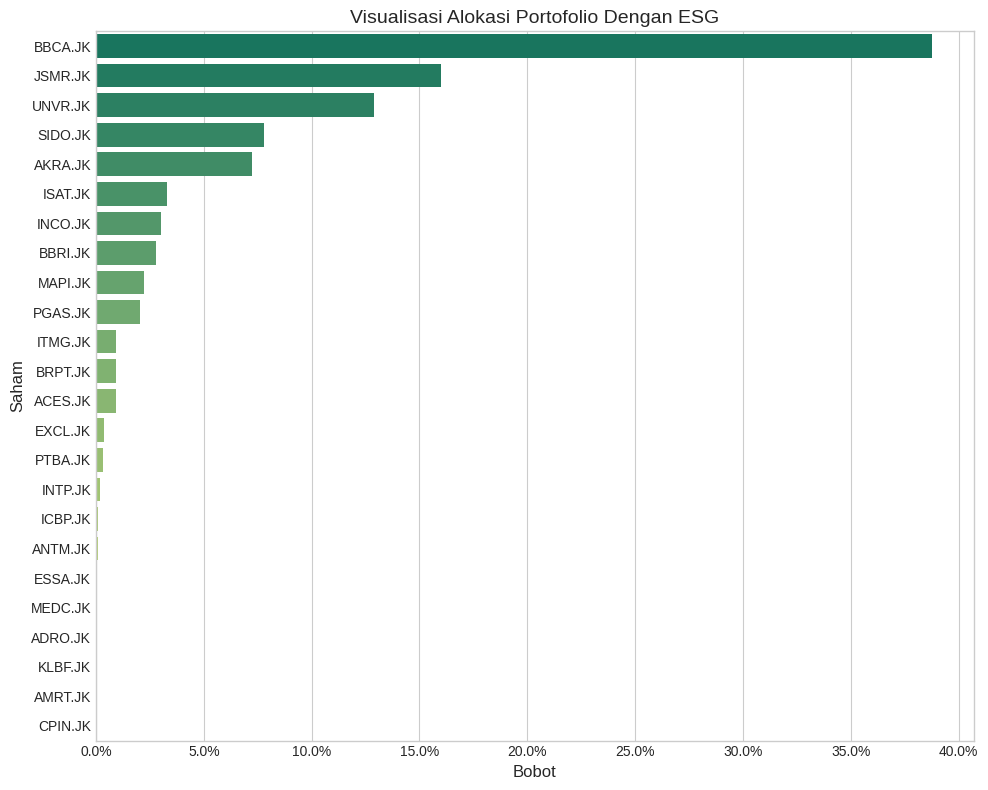

Saham   Bobot
0  BBCA.JK  0.3877
1  JSMR.JK  0.1599
2  UNVR.JK  0.1291
3  SIDO.JK  0.0781
4  AKRA.JK  0.0721
5  ISAT.JK  0.0329
6  INCO.JK  0.0301
7  BBRI.JK  0.0279
8  MAPI.JK  0.0221
9  PGAS.JK  0.0206

✅ File alokasi ESG disimpan sebagai 'alokasi_portofolio_esg_2022_2024.csv'

--- Analisis Alokasi Portofolio Tanpa ESG ---


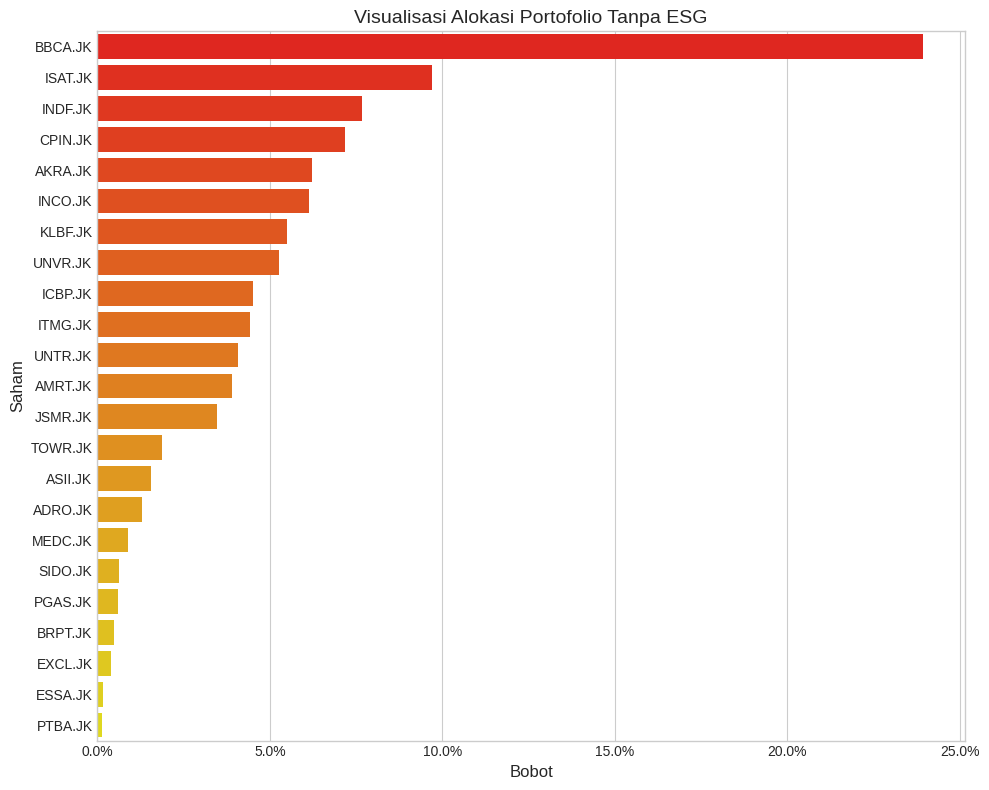

Saham   Bobot
0  BBCA.JK  0.2395
1  ISAT.JK  0.0971
2  INDF.JK  0.0766
3  CPIN.JK  0.0717
4  AKRA.JK  0.0622
5  INCO.JK  0.0614
6  KLBF.JK  0.0550
7  UNVR.JK  0.0526
8  ICBP.JK  0.0452
9  ITMG.JK  0.0441

✅ File alokasi Tanpa ESG disimpan sebagai 'alokasi_portofolio_no_esg_2022_2024.csv'


In [ ]:

# --- PARAMETER ---
start_year = 2022
end_year = 2024

# Validasi rentang tahun
if start_year < 2014 or end_year > 2024 or start_year >= end_year:
    raise ValueError("Rentang tahun harus antara 2014 hingga 2024 dan start_year < end_year")

# Definisikan kedua set bobot portofolio
weights_no_esg = {
    'ACES.JK': 0.0321,  'ADRO.JK': 0.0000,  'AKRA.JK': 0.0382,  'AMRT.JK': 0.1604,
    'ANTM.JK': 0.0000,  'ASII.JK': 0.0000,  'BBCA.JK': 0.1863,  'BBNI.JK': 0.0000,
    'BBRI.JK': 0.0000,  'BBTN.JK': 0.0000,  'BMRI.JK': 0.0000,  'BRPT.JK': 0.0000,
    'CPIN.JK': 0.0000,  'ESSA.JK': 0.0150,  'EXCL.JK': 0.0000,  'ICBP.JK': 0.1041,
    'INCO.JK': 0.0000,  'INDF.JK': 0.0542,  'INKP.JK': 0.0000,  'INTP.JK': 0.0000,
    'ISAT.JK': 0.0097,  'ITMG.JK': 0.0000,  'JSMR.JK': 0.0000,  'KLBF.JK': 0.0178,
    'MAPI.JK': 0.0000,  'MEDC.JK': 0.0000,  'PGAS.JK': 0.0000,  'PTBA.JK': 0.0102,
    'SIDO.JK': 0.1367,  'SMGR.JK': 0.0000,  'SMRA.JK': 0.0000,  'TLKM.JK': 0.0725,
    'TOWR.JK': 0.0018,  'UNTR.JK': 0.0772,  'UNVR.JK': 0.0839
}

weights_esg = {
    'ACES.JK': 0.0494,  'ADRO.JK': 0.0000,  'AKRA.JK': 0.0361,  'AMRT.JK': 0.1135,
    'ANTM.JK': 0.0000,  'ASII.JK': 0.0000,  'BBCA.JK': 0.2407,  'BBNI.JK': 0.0000,
    'BBRI.JK': 0.0404,  'BBTN.JK': 0.0000,  'BMRI.JK': 0.0000,  'BRPT.JK': 0.0000,
    'CPIN.JK': 0.0000,  'ESSA.JK': 0.0000,  'EXCL.JK': 0.0000,  'ICBP.JK': 0.0000,
    'INCO.JK': 0.0000,  'INDF.JK': 0.0000,  'INKP.JK': 0.0000,  'INTP.JK': 0.0000,
    'ISAT.JK': 0.0001,  'ITMG.JK': 0.0000,  'JSMR.JK': 0.1264,  'KLBF.JK': 0.0000,
    'MAPI.JK': 0.0000,  'MEDC.JK': 0.0000,  'PGAS.JK': 0.0000,  'PTBA.JK': 0.0000,
    'SIDO.JK': 0.1972,  'SMGR.JK': 0.0000,  'SMRA.JK': 0.0000,  'TLKM.JK': 0.0070,
    'TOWR.JK': 0.0010,  'UNTR.JK': 0.0000,  'UNVR.JK': 0.1881
}

tickers = list(weights_esg.keys())



# --- AMBIL DATA SAHAM ---
start_date = f'{start_year}-01-01'
end_date = f'{end_year}-01-01'
data = yf.download(tickers + ['^JKLQ45'], start=start_date, end=end_date, interval='1wk')['Close']
data = data.dropna()
returns = data.pct_change().dropna()

# --- HITUNG RETURN PORTOFOLIO ---
portfolio_weights_esg = np.array([weights_esg[t] for t in tickers])
returns_portfolio_esg = returns[tickers] @ portfolio_weights_esg
portfolio_weights_no_esg = np.array([weights_no_esg[t] for t in tickers])
returns_portfolio_no_esg = returns[tickers] @ portfolio_weights_no_esg

# --- HITUNG RETURN KUMULATIF ---
portfolio_cum_esg = (1 + returns_portfolio_esg).cumprod()
portfolio_cum_no_esg = (1 + returns_portfolio_no_esg).cumprod()
lq45_cum = (1 + returns['^JKLQ45']).cumprod()

# --- HITUNG RISIKO PORTOFOLIO (VOLATILITAS) ---
annual_volatility_esg = returns_portfolio_esg.std() * np.sqrt(52) * 100
annual_volatility_no_esg = returns_portfolio_no_esg.std() * np.sqrt(52) * 100
annual_volatility_lq45 = returns['^JKLQ45'].std() * np.sqrt(52) * 100


# --- FUNGSI PERHITUNGAN METRIK ---
def calculate_metrics(returns_series, start_year, end_year, weekly_risk_free_rate):
    """
    Menghitung metrik kinerja portofolio.
    """
    cumulative_returns = (1 + returns_series).cumprod()
    total_return = (cumulative_returns.iloc[-1] - 1) * 100
    expected_annual_return = returns_series.mean() * 52 * 100

    # Hitung CAGR
    num_years = end_year - start_year
    if num_years > 0:
        annualized_cagr = ((cumulative_returns.iloc[-1]) ** (1 / num_years) - 1) * 100
    else:
        annualized_cagr = total_return

    # Hitung Sharpe Ratio (akurat dengan risk-free rate)
    excess_returns = returns_series.mean() - weekly_risk_free_rate
    sharpe_ratio = (excess_returns / returns_series.std()) * np.sqrt(52)

    return total_return, expected_annual_return, annualized_cagr, sharpe_ratio

# Tentukan risk-free rate di luar fungsi
annual_rf_rate = 0.0665
weekly_rf_rate = (1 + annual_rf_rate)**(1/52) - 1

# Panggil fungsi yang sudah diperbaiki untuk setiap portofolio
total_return_esg, expected_return_esg, cagr_esg, sharpe_esg = calculate_metrics(returns_portfolio_esg, start_year, end_year, weekly_rf_rate)
total_return_no_esg, expected_return_no_esg, cagr_no_esg, sharpe_no_esg = calculate_metrics(returns_portfolio_no_esg, start_year, end_year, weekly_rf_rate)
total_return_lq45, expected_return_lq45, cagr_lq45, sharpe_lq45 = calculate_metrics(returns['^JKLQ45'], start_year, end_year, weekly_rf_rate)


# --- RINGKASAN STATISTIK KOMPARATIF ---
esg_scores_array = np.array([esg_scores[t] for t in tickers])
portfolio_score_esg = np.dot(portfolio_weights_esg, esg_scores_array)
portfolio_score_no_esg = np.dot(portfolio_weights_no_esg, esg_scores_array)
benchmark_score_lq45 = esg_scores_array.mean()

print(f"\n📊 Rangkuman Kinerja Portofolio vs LQ45 ({start_year}–{end_year}) 📊")
print(f"Risk-Free Rate yang Digunakan (Tahunan): {annual_rf_rate:.2%}")
print("-----------------------------------------------------------------------------")
print(f"                                     ESG      Tanpa ESG     LQ45")
print("-----------------------------------------------------------------------------")
print(f"Expected Annual Return (%)        : {expected_return_esg:>7.2f}    {expected_return_no_esg:>7.2f}    {expected_return_lq45:>7.2f}")
print(f"Annualized Volatility (%)         : {annual_volatility_esg:>7.2f}    {annual_volatility_no_esg:>7.2f}    {annual_volatility_lq45:>7.2f}")
print(f"Sharpe Ratio (Annual)             : {sharpe_esg:>7.2f}    {sharpe_no_esg:>7.2f}    {sharpe_lq45:>7.2f}")
print(f"Skor ESG (rata-rata tertimbang)   : {portfolio_score_esg:>7.2f}    {portfolio_score_no_esg:>7.2f}    {benchmark_score_lq45:>7.2f}")
print("-----------------------------------------------------------------------------")


# --- VISUALISASI RETURN KUMULATIF ---
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(14, 7))
plt.plot(portfolio_cum_esg, label='Portofolio Dengan ESG', linewidth=2.5)
plt.plot(portfolio_cum_no_esg, label='Portofolio Tanpa ESG', linewidth=2.5)
plt.plot(lq45_cum, label='Indeks LQ45', linewidth=2, linestyle='--')
plt.title(f'Kinerja Kumulatif: Portofolio ESG vs Tanpa ESG vs Indeks LQ45 ({start_year}–{end_year})', fontsize=16)
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Return Kumulatif', fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


# --- ANALISIS ALOKASI PORTOFOLIO ESG ---
print("\n--- Analisis Alokasi Portofolio Dengan ESG ---")
allocation_esg_df = pd.DataFrame({
    'Saham': tickers,
    'Bobot': list(weights_esg.values())
}).sort_values(by='Bobot', ascending=False).reset_index(drop=True)
plt.figure(figsize=(10, 8))
sns.barplot(data=allocation_esg_df[allocation_esg_df['Bobot'] > 0], y='Saham', x='Bobot', palette='summer')
plt.title('Visualisasi Alokasi Portofolio Dengan ESG', fontsize=14)
plt.xlabel('Bobot', fontsize=12)
plt.ylabel('Saham', fontsize=12)
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.tight_layout()
plt.show()
display(allocation_esg_df.head(10))
allocation_esg_df.to_csv(f'alokasi_portofolio_esg_{start_year}_{end_year}.csv', index=False)
print(f"✅ File alokasi ESG disimpan sebagai 'alokasi_portofolio_esg_{start_year}_{end_year}.csv'")


# --- ANALISIS ALOKASI PORTOFOLIO TANPA ESG ---
print("\n--- Analisis Alokasi Portofolio Tanpa ESG ---")
allocation_no_esg_df = pd.DataFrame({
    'Saham': tickers,
    'Bobot': list(weights_no_esg.values())
}).sort_values(by='Bobot', ascending=False).reset_index(drop=True)
plt.figure(figsize=(10, 8))
sns.barplot(data=allocation_no_esg_df[allocation_no_esg_df['Bobot'] > 0], y='Saham', x='Bobot', palette='autumn')
plt.title('Visualisasi Alokasi Portofolio Tanpa ESG', fontsize=14)
plt.xlabel('Bobot', fontsize=12)
plt.ylabel('Saham', fontsize=12)
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.tight_layout()
plt.show()
display(allocation_no_esg_df.head(10))
allocation_no_esg_df.to_csv(f'alokasi_portofolio_no_esg_{start_year}_{end_year}.csv', index=False)
print(f"✅ File alokasi Tanpa ESG disimpan sebagai 'alokasi_portofolio_no_esg_{start_year}_{end_year}.csv'")